
# Introducción a los algoritmos y herramientas de programación de análisis de datos e inteligencia artificial

## Profesorado:
Raúl Benítez, Universitat Politècnica de Catalunya (raul.benitez@upc.edu) 
Jordi Ollé, Conceptosclaros.com (jordiconceptosclaros.com@gmail.com)

## Contenidos:

1.   Introducción (20min, Raúl i Jordi): Inteligencia artificial y reconocimiento de patrones.
2.   Análisis exploratorio de datos (20min, Raúl i Jordi): Técnicas de agrupamiento y visualización de datos
3.   Machine Learning tradicional (20min, Jordi): Métodos supervisados y no-supervisados
4.   Introducción al deep learning (20min, Raúl): Aplicaciones a reconocimiento de imágenes y señales temporales
5. AI con Python utilizando google colab (1h, Raúl)


# 1   Introducción: Porqué Python? 

Python es un lenguaje de programación de alto nivel que permite resolver problemas de proòpsit general. Es especialmente útil en aplicaciones de tratamiento de datos, reconocimiento de patrones e inteligencia artificial.

El objetivo de esta primera parte del curso no es hacer un curso de programación en Python, sino más bien que lo esté utilizando como una herramienta que le será muy útil en diferentes situaciones relacionadas con el análisis explotaròria de datos. Piense en una especie de calculadora científica muy potente.

Python es un lenguaje organizado en diferentes librerías que resultan útiles en diferentes situaciones. Las más importantes en el ámbito del análisis de datos son las siguientes:

NumPy: Operaciones matemáticas básicas con vectores y matrices: https://numpy.org/

Scipy: Operaciones básicas de estadística: https://www.scipy.org/

Pandas: Permite manipular ficheros de datos en formato excel, csv, texto, etc. https://pandas.pydata.org/

Seaborn: Representación gráfica de datos en formato pandas: https://seaborn.pydata.org/

sckit-learn: Herramientas de reconocimiento de patrones e inteligencia artificial https://scikit-learn.org/stable/

sckit-image: Tratamiento de imágenes https://scikit-image.org/




## Jupyter notebooks y google colab

Hay una gran cantidad de entornos de programación que permiten desarrollar programas con Python.

Entre todas las opciones, nosotros utilizaremos una plataforma cloud de google llamada google colaboratory que ya tiene todas las librerías disponibles y permite trabajar sin la necesidad de instalar nada en nuestros ordenadores:

https://colab.research.google.com/


Lo único que nos pide para empezar a trabajar es una cuenta de google. Además, nos permite ejecutar los programas en los servidores de google, lo que puede ser muy útil cuando manipulamos grandes cantidades de datos.

La forma de programar en esta plataforma son los jupyter notebooks: Un notebook es un documento que combina texto y código Python. El texto se utiliza para explicar lo que hacemos en cada momento, y el código Python excuta diferentes segmentos de código que realizan diferentes funciones.


## Acceso a contenidos del google drive:

Podemos acceder a los archivos que tengamos almacenados en nuestro google drive. Para poder acceder hay que montar la unidad google drive en red. Nos pedirá que ponemos un código de verificación de los permisos de acceso.

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


La función os.walk explora de forma recursiva el árbol de directorios a partir de un directorio de origen. La función devuelve los directorios y ficheros que va encontrando en durante la exploración:

In [ ]:
import os

root_folder = '/content/gdrive/My Drive/data_course'

for root, dirs, files in os.walk(root_folder, topdown=False):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

/content/gdrive/My Drive/data_course/titanic/gender_submission.csv
/content/gdrive/My Drive/data_course/titanic/test.csv
/content/gdrive/My Drive/data_course/titanic/train.csv
/content/gdrive/My Drive/data_course/mpg_cars/auto-mpg.csv
/content/gdrive/My Drive/data_course/boston_crime/prueba/crime1.csv
/content/gdrive/My Drive/data_course/boston_crime/prueba/prueba2
/content/gdrive/My Drive/data_course/boston_crime/crime.csv
/content/gdrive/My Drive/data_course/boston_crime/prueba
/content/gdrive/My Drive/data_course/test_dates.xlsx
/content/gdrive/My Drive/data_course/test.xlsx
/content/gdrive/My Drive/data_course/titanic
/content/gdrive/My Drive/data_course/mpg_cars
/content/gdrive/My Drive/data_course/boston_crime


# 2 Análisis exploratorio de datos:

## 2.1 Cargar datos:

### Carga de datos desde fichero excel

Primero cargamos el archivo en nuestro google drive:

In [ ]:
from google.colab import files 
import io
uploaded = files.upload()

Saving test.xlsx to test (1).xlsx


In [ ]:
import pandas as pd
df = pd.read_excel('test.xlsx', index_col=0,header=2)

Ahora consultamos el contenido del archivo mirando la cabecera:

In [ ]:
df.head(3)

Humans  Robots
Date                      
2019-03-10      10       3
2019-03-11      13      10
2019-03-12      16      17

También podriamos haberlo leído desde el google drive


In [ ]:
file_gd = '/content/gdrive/My Drive/data_course/test.xlsx'
dff = pd.read_excel(file_gd,index_col=0,header=2)
dff.head()

Humans  Robots
Date                      
2019-03-10      10       3
2019-03-11      13      10
2019-03-12      16      17
2019-03-13      19      24
2019-03-14      22      31

O directamente desde github en este caso en formato csv:

In [ ]:
!wget -O test_git.csv 'https://raw.githubusercontent.com/raulbenitez/conceptosclaros_ML/master/test.csv'
dfff = pd.read_csv('/content/test_git.csv',index_col=0,header=2,sep=';')
dfff.head()


--2020-06-18 09:45:08--  https://raw.githubusercontent.com/raulbenitez/conceptosclaros_ML/master/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217 [text/plain]
Saving to: ‘test_git.csv’

test_git.csv        100%[===================>]     217  --.-KB/s    in 0s      

2020-06-18 09:45:08 (8.40 MB/s) - ‘test_git.csv’ saved [217/217]



Humans  Robots
Date                      
18/06/2020      10       3
19/06/2020      13      10
20/06/2020      16      17
21/06/2020      19      24
22/06/2020      22      31

## 2.2 Manipulación básica de datos en pandas:




Consultamos las dimensiones del archivo (filas, columnas):

In [ ]:
df.shape

(9, 2)

Accedemos a una de las columnas:

In [ ]:
df['Humans']

Date
2019-03-10    10
2019-03-11    13
2019-03-12    16
2019-03-13    19
2019-03-14    22
2019-03-15    25
2019-03-16    28
2019-03-17    31
2019-03-18    34
Name: Humans, dtype: int64

In [ ]:
df['Humans'].values


array([10, 13, 16, 19, 22, 25, 28, 31, 34])

Buscamos los datos en un cierto intervalo de tiempo:

In [ ]:
import datetime 
df.loc[datetime.date(year=2019,month=1,day=1):datetime.date(year=2019,month=3,day=11)]


Humans  Robots
Date                      
2019-03-10      10       3
2019-03-11      13      10

Podemos buscar los datos que cumplen cierta condición:


In [ ]:
df.loc[df['Humans']>6]

Humans  Robots
Date                      
2019-03-10      10       3
2019-03-11      13      10
2019-03-12      16      17
2019-03-13      19      24
2019-03-14      22      31
2019-03-15      25      38
2019-03-16      28      45
2019-03-17      31      52
2019-03-18      34      59

Y hacer búsqueda combinada de diferentes restricciones:

In [ ]:
df.loc[(df['Humans']>6) & (df['Robots']>20)]

Humans  Robots
Date                      
2019-03-13      19      24
2019-03-14      22      31
2019-03-15      25      38
2019-03-16      28      45
2019-03-17      31      52
2019-03-18      34      59

### Bases de datos de Kaggle: El Titanic dataset:

Ahora miramos algún tipo de datos más interesantes:

https://www.kaggle.com/c/titanic


También se puede acceder a los datos en mi unidad de drive de google: https://drive.google.com/drive/folders/1PWe3IfY24py2lOBjsPgluDjTQnSGvXhN?usp=sharing


In [ ]:
df1 = pd.read_csv('/content/gdrive/My Drive/data_course/titanic/train.csv')
df1.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [ ]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Lo primero que podemos hacer es consultar una tabla estadística descriptiva de los datos:

In [ ]:
df1.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

Cada fila corresponde a un pasajero, y las columnas son sus atributos (si sobrevivieron, en qué clase ivan, etc).



Podemos mirar qué fracción tenemos de supervivientes del total de pasajeros de la base de datos:

In [ ]:
N = df1.shape[0]
Nvius = df1.loc[df1['Survived']==1].shape[0]
Nmorts = df1.loc[df1['Survived']==0].shape[0]
print('Hi ha un total de {} passatgers, dels quals {} van sobreviure i {} van morir'.format(N,Nvius,Nmorts))

Hi ha un total de 891 passatgers, dels quals 342 van sobreviure i 549 van morir


Podemos calcular los valores promedio de los atributos en función de si son o no supervivientes:

In [ ]:
df1_agrupats = df1.groupby(by=['Survived'])
df1_agrupats.mean()

PassengerId    Pclass        Age     SibSp     Parch       Fare
Survived                                                                 
0          447.016393  2.531876  30.626179  0.553734  0.329690  22.117887
1          444.368421  1.950292  28.343690  0.473684  0.464912  48.395408

Por ejemplo, vemos que los supervivientes son, en promedio, más jóvenes y además iban en camarotes de clase superior. De hecho la variable Fare (lo que pagaron por el pasaje) es claramente superior en los supervivientes.

Podemos responder a preguntas como: ¿cuál es el pasajero más joven y el más grande del conjunto de datos?

---



In [ ]:
df1.sort_values(by=['Age'],ascending=False)



PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
630          631         1       1  ...  30.0000   A23         S
851          852         0       3  ...   7.7750   NaN         S
493          494         0       1  ...  49.5042   NaN         C
96            97         0       1  ...  34.6542    A5         C
116          117         0       3  ...   7.7500   NaN         Q
..           ...       ...     ...  ...      ...   ...       ...
859          860         0       3  ...   7.2292   NaN         C
863          864         0       3  ...  69.5500   NaN         S
868          869         0       3  ...   9.5000   NaN         S
878          879         0       3  ...   7.8958   NaN         S
888          889         0       3  ...  23.4500   NaN         S

[891 rows x 12 columns]

### Gestión de datos incompletos

Vemos que desconocemos la edad de alguno de los pasajeros. En concreto, tenemos un total de 177 pasajeros de los que desconocemos su edad:


In [ ]:
df1.loc[df1['Age'].isna()==True].shape[0]

177

Hay diferentes estrategias para tratar los datos desconocidos:

La primera sería eliminar los pasajeros de los que no tenemos su edad:

In [ ]:
df1_ambedats = df1['Age'].dropna()
df1_ambedats.shape

(714,)

La segunda forma de proceder sería sustituir su edad por un valor constante, por ejemplo para la media de edades del resto de pasajeros:

In [ ]:
df1_fillmean = df1.fillna(df1.mean())
df1_fillmean.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

La tercera, y quizás la más inteligente, sería la de imputar una edad en función de la edad que tengan pasajeros con propiedades numéricas similares. Por eso tendremos que usar las librerías de inteligencia artificial sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

Primero definimos un dataframe que sólo contenga los atributos numéricos:

In [ ]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df1_num = df1.select_dtypes(include='number')
df1_num.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

In [ ]:
df1_num.loc[df1_num['Age'].isna()==True]

PassengerId  Survived  Pclass  Age  SibSp  Parch     Fare
5              6         0       3  NaN      0      0   8.4583
17            18         1       2  NaN      0      0  13.0000
19            20         1       3  NaN      0      0   7.2250
26            27         0       3  NaN      0      0   7.2250
28            29         1       3  NaN      0      0   7.8792
..           ...       ...     ...  ...    ...    ...      ...
859          860         0       3  NaN      0      0   7.2292
863          864         0       3  NaN      8      2  69.5500
868          869         0       3  NaN      0      0   9.5000
878          879         0       3  NaN      0      0   7.8958
888          889         0       3  NaN      1      2  23.4500

[177 rows x 7 columns]

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_data = imputer.fit_transform(df1_num)

df1_imputed = pd.DataFrame(imputed_data,columns=df1_num.columns)
df1_imputed.loc[df1_num['Age'].isna()==True]

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
5            6.0       0.0     3.0  30.5    0.0    0.0   8.4583
17          18.0       1.0     2.0  44.5    0.0    0.0  13.0000
19          20.0       1.0     3.0  14.5    0.0    0.0   7.2250
26          27.0       0.0     3.0  24.5    0.0    0.0   7.2250
28          29.0       1.0     3.0  40.5    0.0    0.0   7.8792
..           ...       ...     ...   ...    ...    ...      ...
859        860.0       0.0     3.0  19.5    0.0    0.0   7.2292
863        864.0       0.0     3.0  39.0    8.0    2.0  69.5500
868        869.0       0.0     3.0  15.0    0.0    0.0   9.5000
878        879.0       0.0     3.0  19.5    0.0    0.0   7.8958
888        889.0       0.0     3.0  29.0    1.0    2.0  23.4500

[177 rows x 7 columns]

Comentario: También podemos acceder al dataset titanic y a muchos otros de prueba mediante algunas de las librerías de Python para hacer tratamiento de datos. En este caso, por ejemplo, a partir de las librerías de representación gráfica Seaborn https://seaborn.pydata.org/

In [ ]:
KNNImputer?

In [ ]:
import seaborn as sns
dtitanic = sns.load_dataset('titanic')
dtitanic.head()

survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]

### Ejercicio: Cargue los datos mpg cars de la web de Kaggle datasets:

https://www.kaggle.com/uciml/autompg-dataset

El conjunto de datos contiene 9 atributos de un total de 398 coches. Algunos atributos son numéricos, de otros son categóricos.

1. mpg: miles por gallon: continuous
2. cylinders: multi-Valued discrete
3. displacement: continuous
4. Horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. modelo year: multi-Valued discrete (1: USA, 2: Europe, 3: Japan)
8. origin: multi-Valued discrete
9. caro name: string (unique for each instance)


Responda a las siguientes cuestiones:

  a) ¿Cuál es el rango de años de los coches incluidos en los datos?

  b) ¿Cuántos coches hay que sean del año 74?

  c) ¿Cuál es el peso medio y el mpg promedio de los coches del año 70? Y los del año 80? Observa alguna tendencia en la evolución de estas dos magituds a medida que incrementa el año del modelo?

In [ ]:
df2 = pd.read_csv('/content/gdrive/My Drive/data_course/mpg_cars/auto-mpg.csv')
df2.head()

mpg  cylinders  displacement  ... model year  origin                   car name
0  18.0          8         307.0  ...         70       1  chevrolet chevelle malibu
1  15.0          8         350.0  ...         70       1          buick skylark 320
2  18.0          8         318.0  ...         70       1         plymouth satellite
3  16.0          8         304.0  ...         70       1              amc rebel sst
4  17.0          8         302.0  ...         70       1                ford torino

[5 rows x 9 columns]

Lo primero que podemos hacer es sustituir los valores numéricos de la columna origin por las palabras que describen el origen del coche:


In [ ]:
df2['origin'] = df2.origin.replace([1,2,3],['USA','Europe','Japan'])
df2.head()

mpg  cylinders  displacement  ... model year  origin                   car name
0  18.0          8         307.0  ...         70     USA  chevrolet chevelle malibu
1  15.0          8         350.0  ...         70     USA          buick skylark 320
2  18.0          8         318.0  ...         70     USA         plymouth satellite
3  16.0          8         304.0  ...         70     USA              amc rebel sst
4  17.0          8         302.0  ...         70     USA                ford torino

[5 rows x 9 columns]

In [ ]:
df2.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

Los modelos van del año 70 al año 82:

In [ ]:
df2.sort_values(by=['model year'])

mpg  cylinders  ...  origin                   car name
0    18.0          8  ...     USA  chevrolet chevelle malibu
28    9.0          8  ...     USA                   hi 1200d
27   11.0          8  ...     USA                 dodge d200
26   10.0          8  ...     USA                  chevy c20
25   10.0          8  ...     USA                  ford f250
..    ...        ...  ...     ...                        ...
368  27.0          4  ...     USA   chevrolet cavalier wagon
367  28.0          4  ...     USA         chevrolet cavalier
396  28.0          4  ...     USA                ford ranger
381  36.0          4  ...   Japan               honda accord
397  31.0          4  ...     USA                 chevy s-10

[398 rows x 9 columns]

También lo podemos hacer con:

In [ ]:
df2.describe()

mpg   cylinders  ...  acceleration  model year
count  398.000000  398.000000  ...    398.000000  398.000000
mean    23.514573    5.454774  ...     15.568090   76.010050
std      7.815984    1.701004  ...      2.757689    3.697627
min      9.000000    3.000000  ...      8.000000   70.000000
25%     17.500000    4.000000  ...     13.825000   73.000000
50%     23.000000    4.000000  ...     15.500000   76.000000
75%     29.000000    8.000000  ...     17.175000   79.000000
max     46.600000    8.000000  ...     24.800000   82.000000

[8 rows x 6 columns]

df2.describe

In [ ]:
N70 = df2.loc[df2['model year']==70].shape[0]

print('Hay un total de {} coches del 70'.format(N70))

Hay un total de 29 coches del 70


A continuación podemos mirar la evolución de las diferentes características en función del año del modelo:

In [ ]:
df2.groupby(by=['model year']).mean()


mpg  cylinders  displacement       weight  acceleration
model year                                                               
70          17.689655   6.758621    281.413793  3372.793103     12.948276
71          21.250000   5.571429    209.750000  2995.428571     15.142857
72          18.714286   5.821429    218.375000  3237.714286     15.125000
73          17.100000   6.375000    256.875000  3419.025000     14.312500
74          22.703704   5.259259    171.740741  2877.925926     16.203704
75          20.266667   5.600000    205.533333  3176.800000     16.050000
76          21.573529   5.647059    197.794118  3078.735294     15.941176
77          23.375000   5.464286    191.392857  2997.357143     15.435714
78          24.061111   5.361111    177.805556  2861.805556     15.805556
79          25.093103   5.827586    206.689655  3055.344828     15.813793
80          33.696552   4.137931    115.827586  2436.655172     16.934483
81          30.334483   4.620690    135.310345  2522.931034     16.306897
82          31.709677   4.193548    128.870968  2453.548387     16.638710

El peso y mpg promedio de los coches del año 70 es de (3372,17.68) y el de los del año 80 de (2.436,33) respectivamente. Resulta evidente que con los tiempos los coches son más eficientes (mayor mpg) y más ligeros (menos peso). Esto se puede ver con la evolución de estas dos variables a lo largo de los años.

## 2.3 Representación gráfica de datos:

Llegado este punto, necesitamos empezar a hacer gráficos para representar diferentes aspectos de lo que vemos en los datos. Para hacer gráficos de datos en formato dataframe de pandas, la mejor opción es utilizar las librerías Seaborn:

https://seaborn.pydata.org/

En el ejercicio anterior, queríamos representar la evolución de las variables mpg y peso en función del año del modelo.


In [ ]:
import seaborn as sns
df22 = sns.load_dataset('mpg')
df22.head()

mpg  cylinders  displacement  ...  model_year  origin                       name
0  18.0          8         307.0  ...          70     usa  chevrolet chevelle malibu
1  15.0          8         350.0  ...          70     usa          buick skylark 320
2  18.0          8         318.0  ...          70     usa         plymouth satellite
3  16.0          8         304.0  ...          70     usa              amc rebel sst
4  17.0          8         302.0  ...          70     usa                ford torino

[5 rows x 9 columns]

### Gráficos básicos

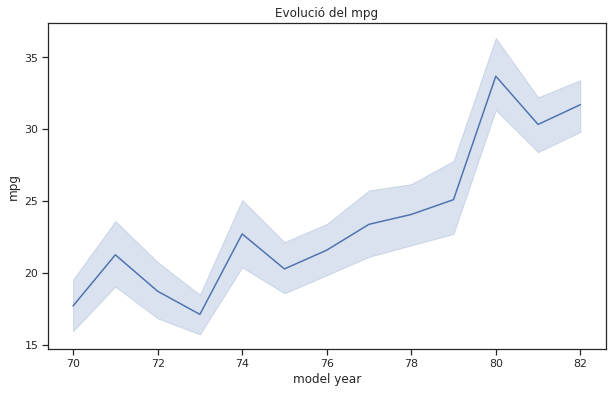

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="model year", y="mpg", data=df2)
ax.set_title('Evolució del mpg')
plt.show()
plt.savefig('evolucion.png')

Podemos hacer una figura con dos paneles, el superior que representa el mpg y el inferior representante la evolución del peso:

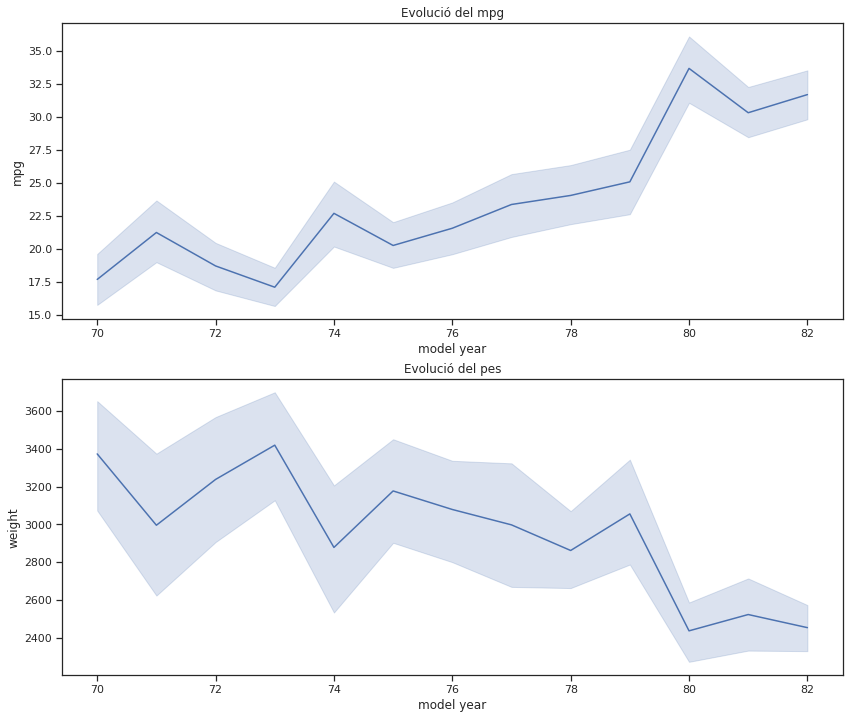

In [ ]:

fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(211)
ax = sns.lineplot(x="model year", y="mpg", data=df2)
ax.set_title('Evolució del mpg')
ax1 = fig.add_subplot(212)
ax1 = sns.lineplot(x="model year", y="weight", data=df2)
ax1.set_title('Evolució del pes')
plt.show()

Multiples paneles en una figura:

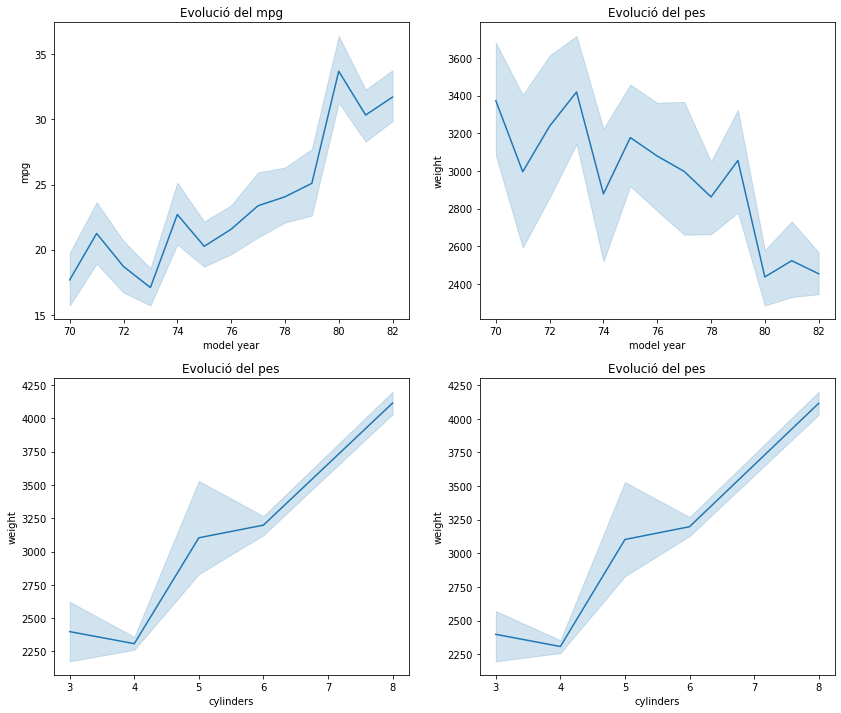

In [ ]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(221)
ax = sns.lineplot(x="model year", y="mpg", data=df2)
ax.set_title('Evolució del mpg')
ax1 = fig.add_subplot(222)
ax1 = sns.lineplot(x="model year", y="weight", data=df2)
ax1.set_title('Evolució del pes')
ax2 = fig.add_subplot(223)
ax2 = sns.lineplot(x="cylinders", y="weight", data=df2)
ax2.set_title('Evolució del pes')
ax3 = fig.add_subplot(224)
ax3 = sns.lineplot(x="cylinders", y="weight", data=df2)
ax3.set_title('Evolució del pes')
plt.show()

También podemos mirar cómo evoluciona el mpg en función de su origen:


In [ ]:
df2['origin'].unique()

array(['USA', 'Japan', 'Europe'], dtype=object)

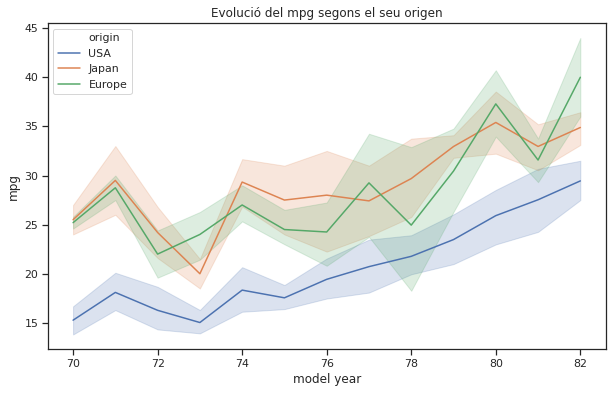

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="model year", y="mpg",hue='origin',data=df2)
ax.set_title('Evolució del mpg segons el seu origen')
plt.show()

Existe mucha correlación entre peso y eficiencia? Mirémoslo:



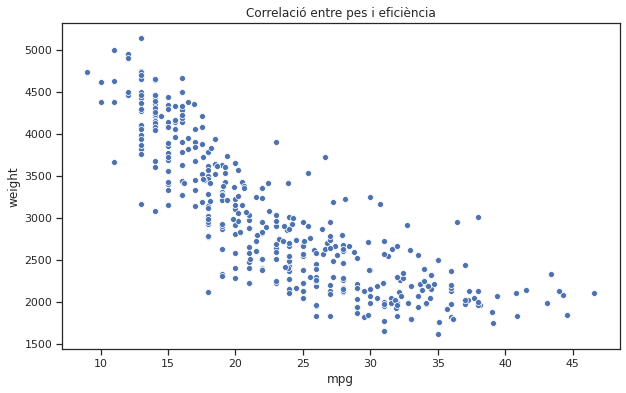

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="mpg", y="weight", data=df2)
ax.set_title('Correlació entre pes i eficiència')
plt.show()

Podemos hacer un modelo lineal del comportamiento

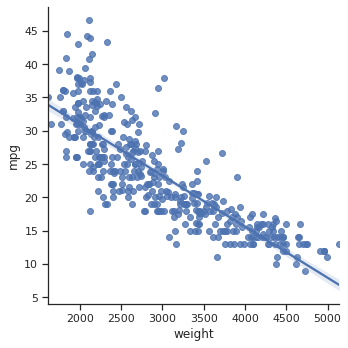

In [ ]:
ax = sns.lmplot(x="weight", y="mpg", data=df2)


Teniendo en cuenta el origen, la relación entre peso y mpg puede ser diferente:

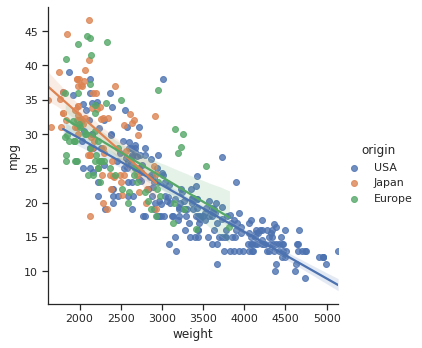

In [ ]:
ax = sns.lmplot(x="weight", y="mpg", hue='origin',data=df2)


De hecho observamos que los coches de origen europeo y japonés suelen tener menor peso y una mayor eficiencia.

Y si queremos representar la aceleración en función del número de cilindros? Hay muchas opciones:

Un Scatterplot no parece la mejor de las opciones, porque la variable cylinders toma valores discretos:

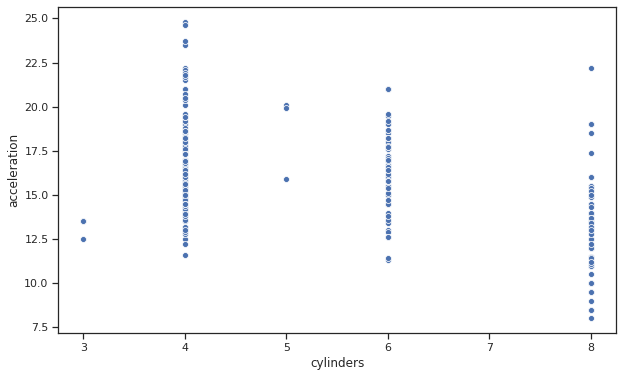

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="cylinders", y="acceleration", data=df2)
plt.show()

Quizás mejor un gráfico de barras:

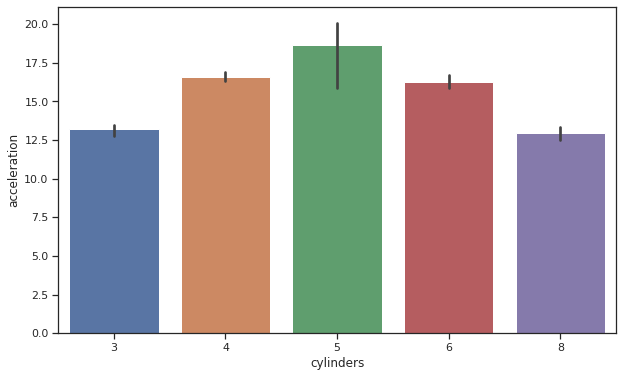

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="cylinders", y="acceleration", data=df2)
plt.show()

Y en función de su origen vemos que los coches con sólo 3 cilindros son Japoneses y los de 8 son todos los USA.

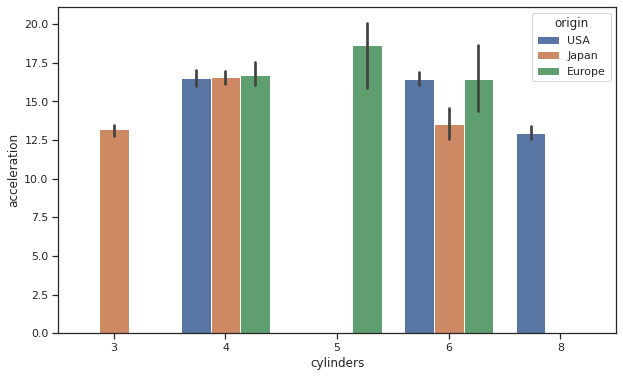

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="cylinders", y="acceleration", hue='origin',data=df2)
plt.show()

Aceleracion vs peso en función de los cilindros


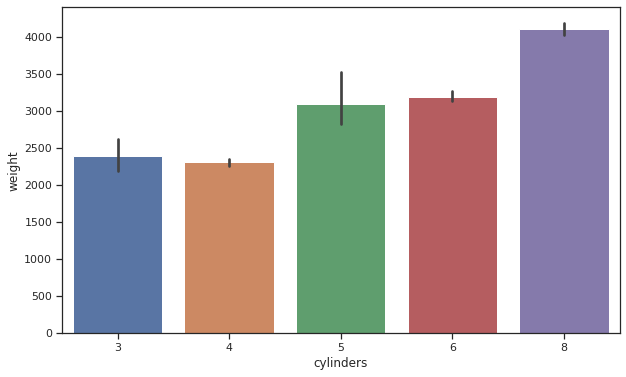

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="cylinders", y="weight", data=df2)
plt.show()

### Histogramas

Probabilidad de observar un determinado rango de valores en la distribución de una variable:

¿Cuál es la distribución de la variable weight?

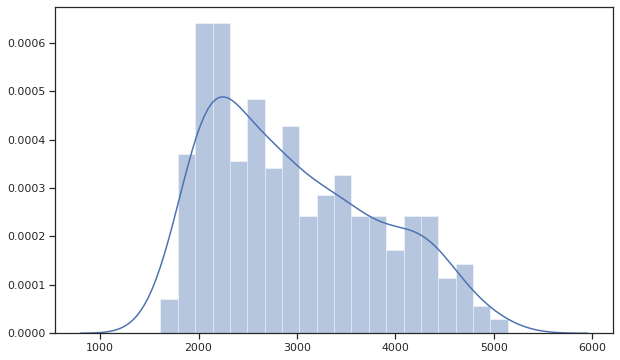

In [ ]:
fig = plt.figure(figsize=(10,6))
ax=sns.distplot(df2["weight"].values,bins=20)

Si queremos marcar la posición del valor medio y de la mediana de la distribución


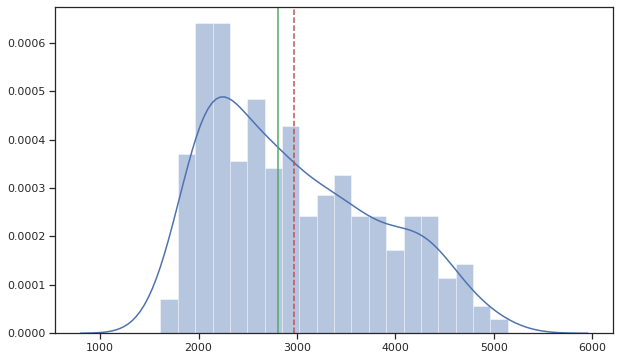

In [ ]:
media_weight = df2['weight'].mean()
mediana_weight = df2['weight'].median()

fig = plt.figure(figsize=(10,6))
ax=sns.distplot(df2["weight"].values,bins=20)
plt.axvline(media_weight, color="r", linestyle="--");
plt.axvline(mediana_weight, color="g", linestyle="-");

Indicar donde esta la media y las desviaciones tipicas a la izquierda y derecha de la media:

In [ ]:
std_weight = df2['weight'].std()


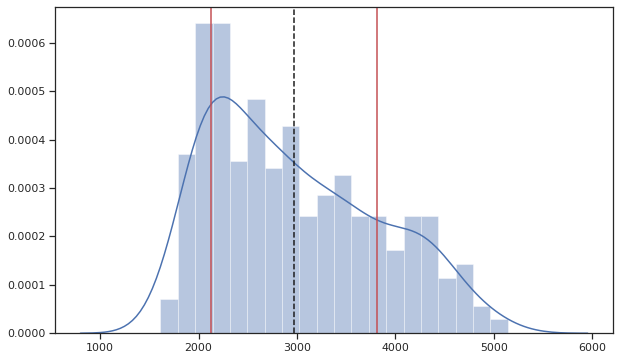

In [ ]:

fig = plt.figure(figsize=(10,6))
ax=sns.distplot(df2["weight"].values,bins=20)
plt.axvline(media_weight, color="k", linestyle="--");
plt.axvline(media_weight-std_weight, color="r", linestyle="-");
plt.axvline(media_weight+std_weight, color="r", linestyle="-");


Como sería la distribución conjunta de las variables weight y acceleration?

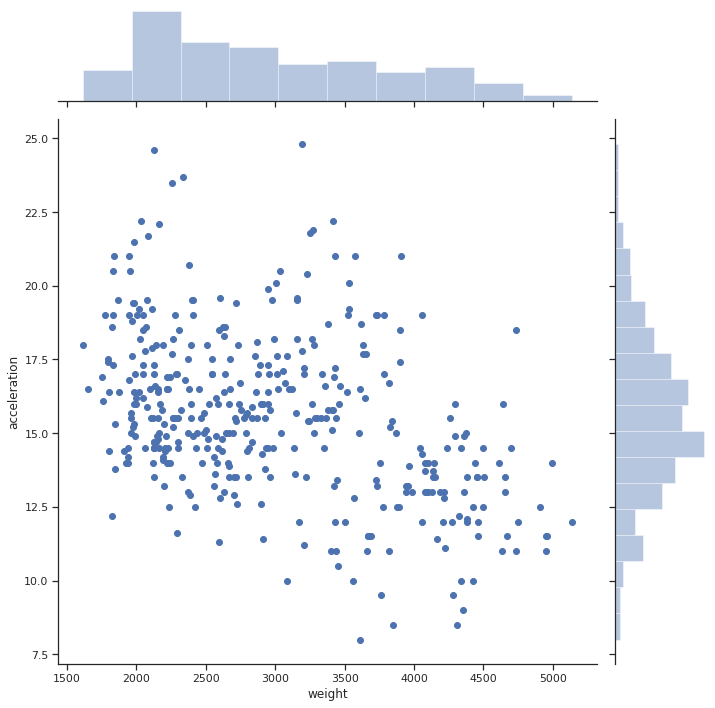

In [ ]:
ax = sns.jointplot(x='weight',y='acceleration',data=df2,height=10)

### Representación gráfica de datos multivariados:

Por último, podemos hacer una representación de todas las variables de forma simultánea

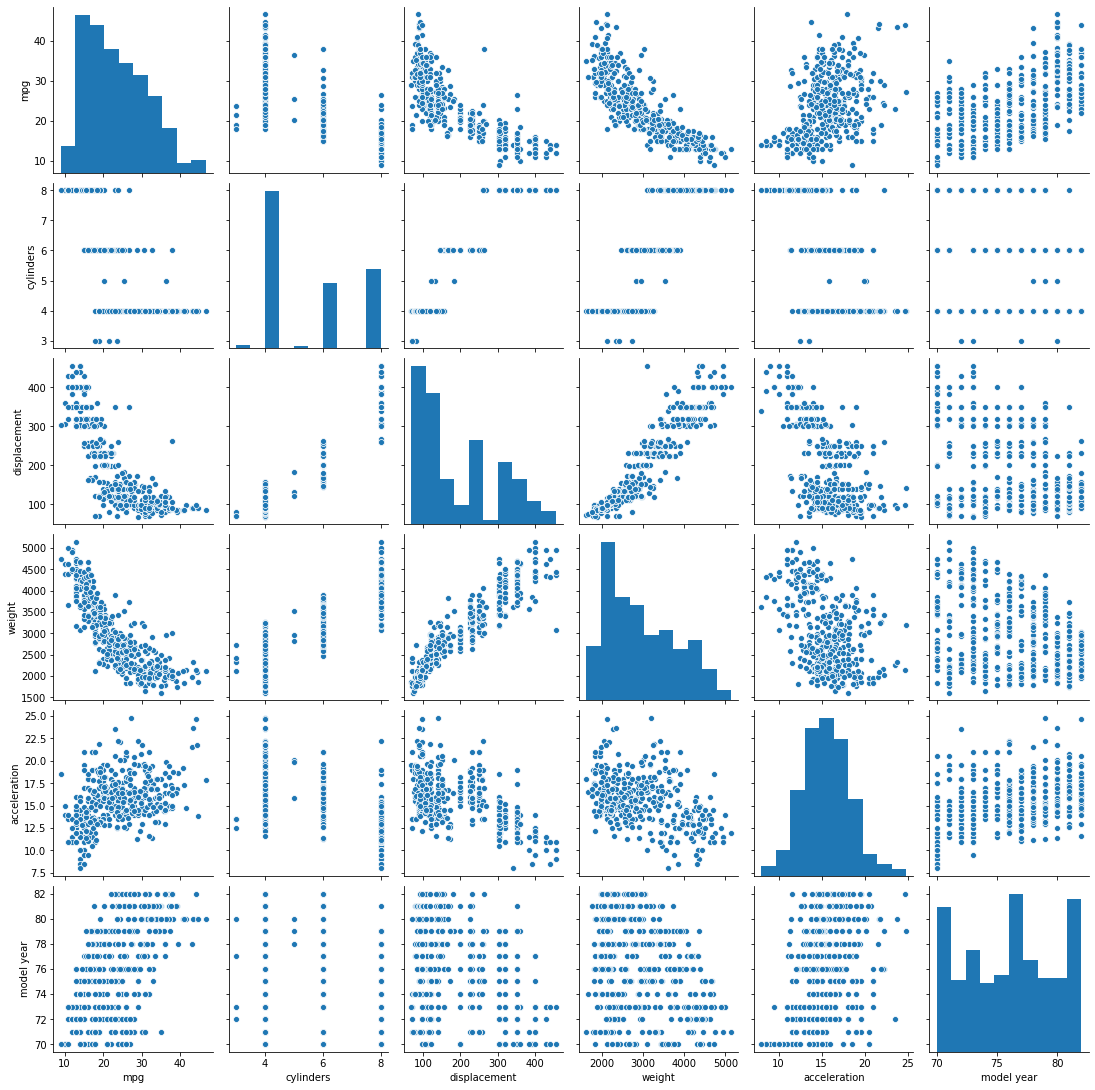

In [ ]:
sns.pairplot(df2)
plt.show()

Y la misma representación pero indicando con colores diferentes los coches según su origen

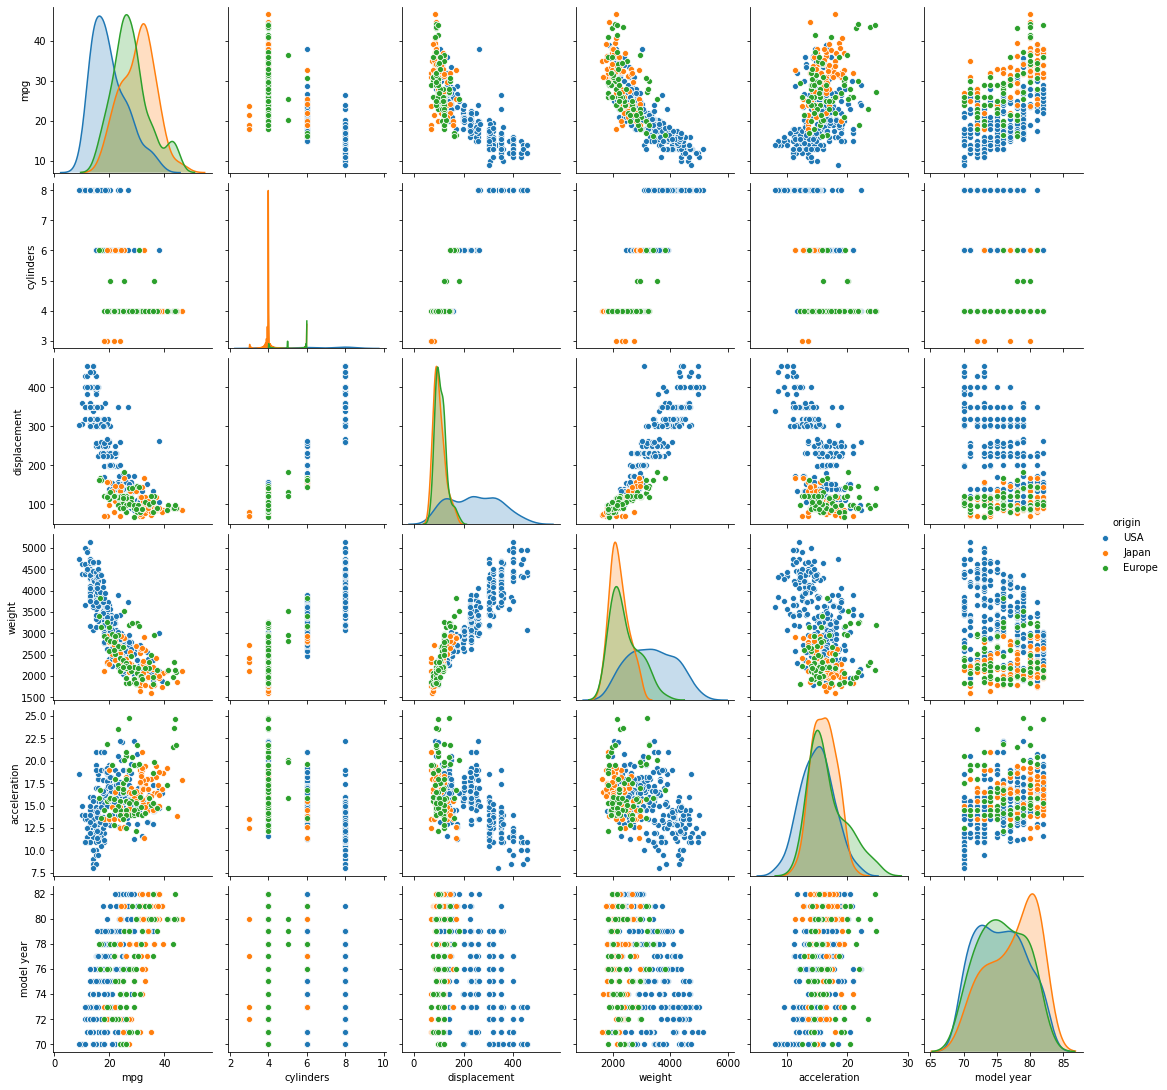

In [ ]:
sns.pairplot(df2,hue="origin")


Representar unicamente variables numéricas

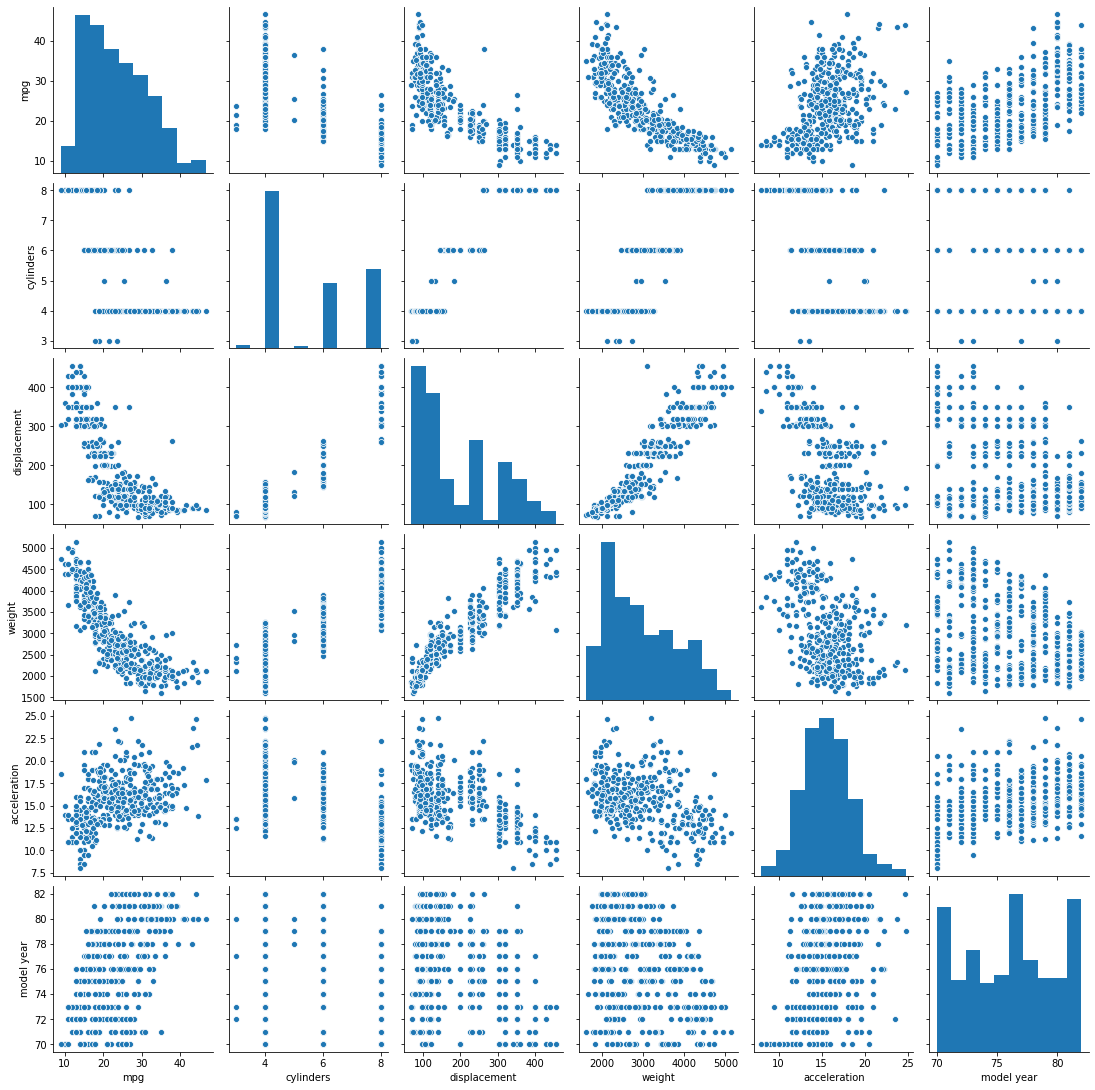

In [ ]:
df2_num = df2.select_dtypes(include='number')
sns.pairplot(df2_num)

### Ejercicio: Cargad el Boston Crime dataset

Y generad un informe en forma de jupyter notebook con las características más relevantes

In [ ]:
df3 = pd.read_csv('/content/gdrive/My Drive/data_course/boston_crime/crime.csv', engine='python')
df3.head()

INCIDENT_NUMBER  OFFENSE_CODE  ...       Long                     Location
0      I182080058          2403  ... -71.121186  (42.26260773, -71.12118637)
1      I182080053          3201  ... -71.135311  (42.35211146, -71.13531147)
2      I182080052          2647  ... -71.076930  (42.30812619, -71.07692974)
3      I182080051           413  ... -71.059648  (42.35945371, -71.05964817)
4      I182080050          3122  ... -71.024663  (42.37525782, -71.02466343)

[5 rows x 17 columns]

In [ ]:
df3.describe()

OFFENSE_CODE           YEAR  ...            Lat           Long
count  327820.000000  327820.000000  ...  307188.000000  307188.000000
mean     2317.961171    2016.598676  ...      42.212995     -70.906030
std      1184.990073       1.009775  ...       2.173496       3.515832
min       111.000000    2015.000000  ...      -1.000000     -71.178674
25%      1001.000000    2016.000000  ...      42.297466     -71.097081
50%      2907.000000    2017.000000  ...      42.325552     -71.077493
75%      3201.000000    2017.000000  ...      42.348624     -71.062482
max      3831.000000    2018.000000  ...      42.395042      -1.000000

[8 rows x 6 columns]

## 2.4 Técnicas de agrupamiento de datos (data clustering):

Algoritmos no-supervisados que permiten agrupar datos multidimensionales en clusters:

## El algoritmo K-means:


[1] Specify the number of clusters $k$ to be found in data.

[2] Set initial values for the cluster centroids $\mu^0_1,\dots,\mu^0_k$ (at random or prior knowledge). 

[3] Assign each observation to the nearest cluster (euclidean distance).

[4] Recompute the centroid of each cluster from the assigned observations $\mu^1_1,\dots,\mu^1_k$.

[5] Repeat steps 3-4 until no change in the centroids. Provide final clustering $\mu^n_1,\dots,\mu^n_k$, where $n$ is the number of iterations. 


### Ejemplo introductorio

K-means con unas pocas observaciones


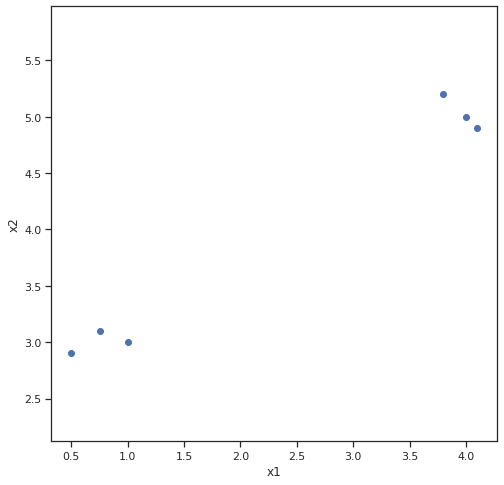

In [ ]:
import numpy as np
import matplotlib.pylab as plt
D = np.array([[1,3],[3.8,5.2],[0.5,2.9],[0.75,3.1],[4,5],[4.1,4.9]])

fig = plt.figure(figsize=(8,8))
plt.scatter(D[:,0],D[:,1])
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

In [ ]:
D

array([[1.  , 3.  ],
       [3.8 , 5.2 ],
       [0.5 , 2.9 ],
       [0.75, 3.1 ],
       [4.  , 5.  ],
       [4.1 , 4.9 ]])

In [ ]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=2).fit_predict(D)
print(group)

[1 0 1 1 0 0]


In [ ]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame(D,columns=['x','y'])
df['kmeans']=group
df.head()

x    y  kmeans
0  1.00  3.0       1
1  3.80  5.2       0
2  0.50  2.9       1
3  0.75  3.1       1
4  4.00  5.0       0

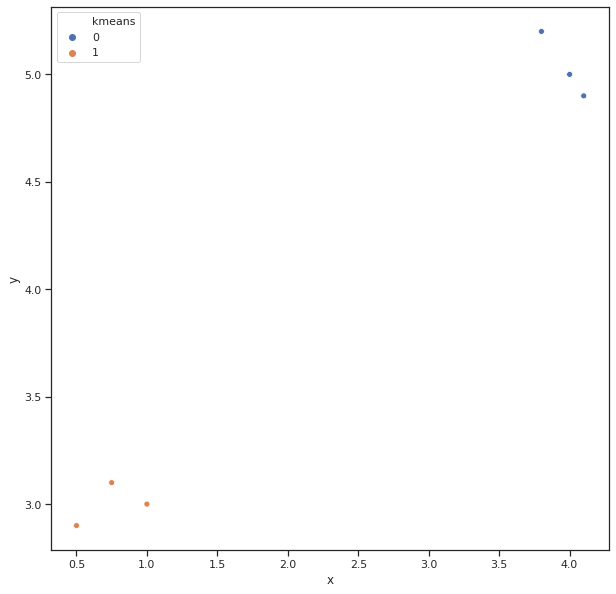

In [ ]:
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x='x',y='y',hue='kmeans',data=df)
plt.show()

NOTA: Si queremos conocer más detalles sobre los clústeres encontrados, utilizad la función fit y no fit_predict (ésta última devuelve sólo las etiquetas de asignación de las observaciones a clústeres, es decir la predicción del algoritmo k-means). El detalle de variables se puede consultar en https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
kmeans_result = KMeans(n_clusters=2).fit(D)
print('Etiquetas de asignacion a clusters {}'.format(kmeans_result.labels_))
print('Posición de los centroides de los clusters {}'.format(kmeans_result.cluster_centers_))
print('Número de iteraciones necesarias {}'.format(kmeans_result.n_iter_))

Etiquetas de asignacion a clusters [0 1 0 0 1 1]
Posición de los centroides de los clusters [[0.75       3.        ]
 [3.96666667 5.03333333]]
Número de iteraciones necesarias 2


### Agrupamiento del iris dataset:

In [ ]:
import seaborn as sns; 

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")

X = iris[['sepal_length','sepal_width','petal_length','petal_width']] # features
y = iris['species'] # class labels

K-means de los datos iris en 2 dimensiones:

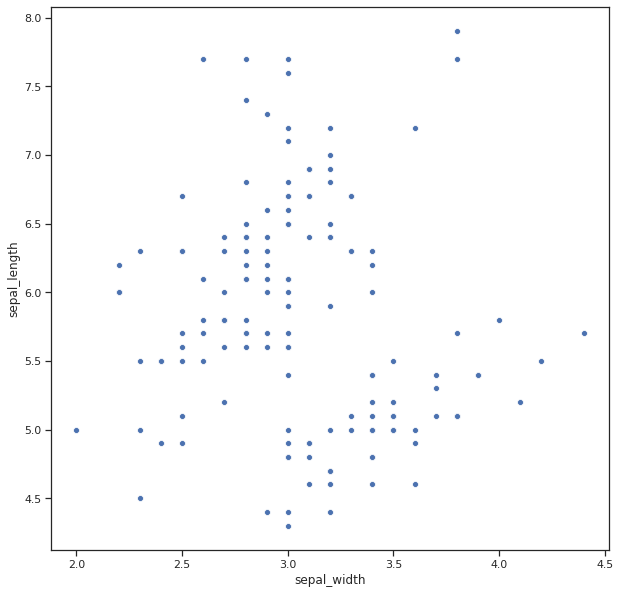

In [ ]:
import matplotlib.pylab as plt
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x='sepal_width',y='sepal_length',data=X)
plt.show()

In [ ]:
import numpy as np
D = np.array(X)
D.shape

(150, 4)

Aplicamos k-means

In [ ]:
group = KMeans(n_clusters=3).fit_predict(D[:,0:2])
print(group)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
group = KMeans(n_clusters=3).fit_predict(D)
print(group)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


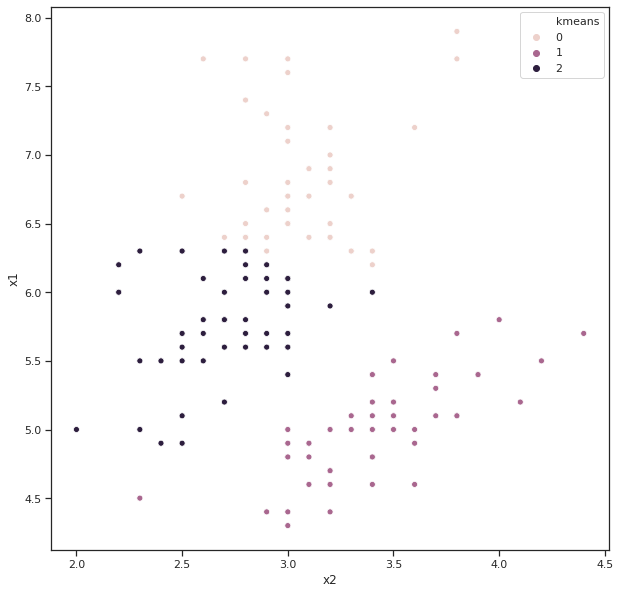

In [ ]:
df = pd.DataFrame(D[:,0:2],columns=['x1','x2'])
df['kmeans'] = group 
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x='x2',y='x1',hue='kmeans',data=df)
plt.show()

Aplicación a iris en 4D:

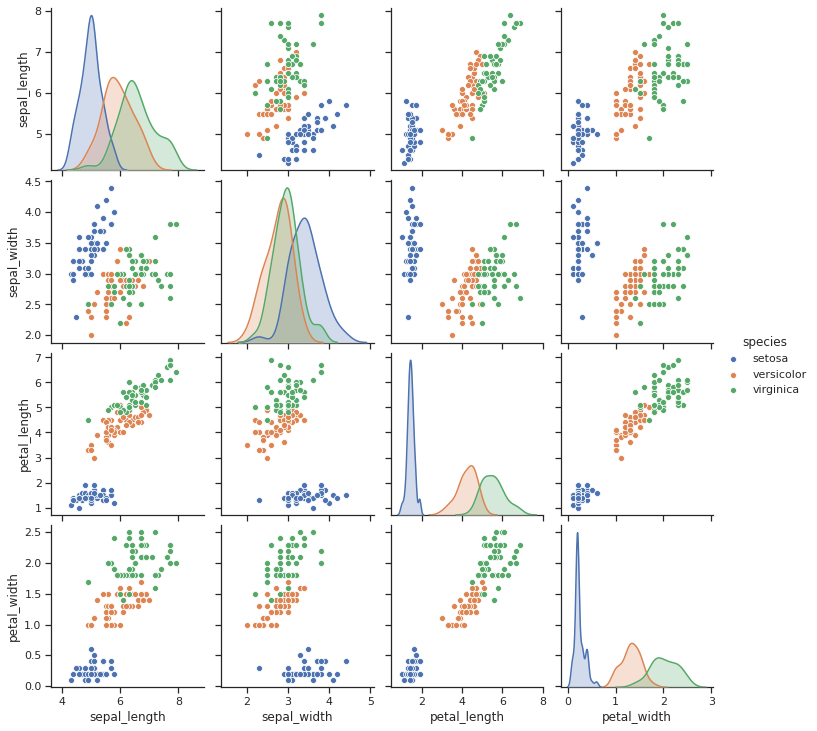

In [ ]:
g = sns.pairplot(iris, hue="species")


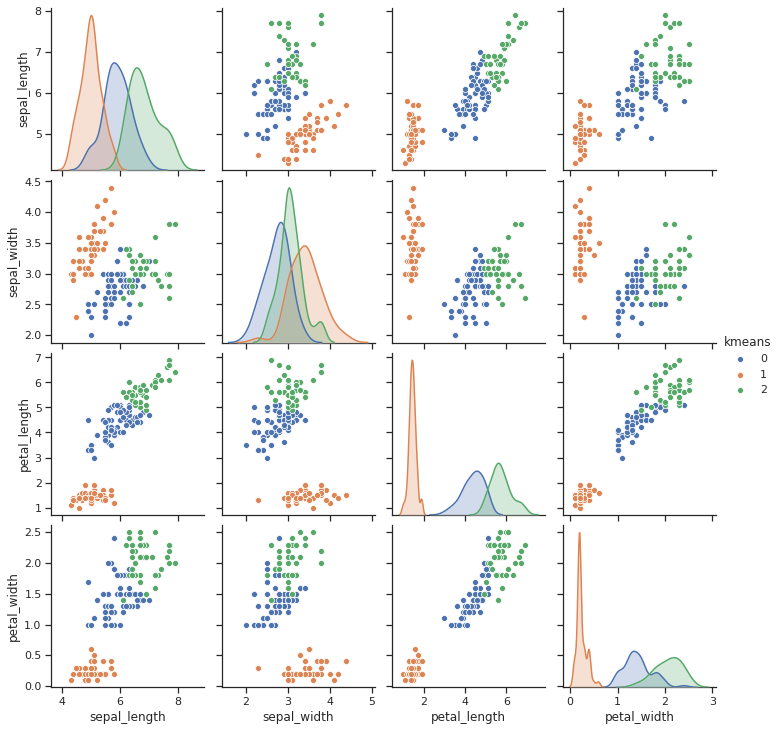

In [ ]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=3).fit_predict(X)

iris_grouped = iris
iris_grouped['kmeans'] = group
g = sns.pairplot(iris_grouped, hue="kmeans")

In [ ]:
iris_grouped.head(150)

sepal_length  sepal_width  petal_length  petal_width    species  kmeans
0             5.1          3.5           1.4          0.2     setosa       1
1             4.9          3.0           1.4          0.2     setosa       1
2             4.7          3.2           1.3          0.2     setosa       1
3             4.6          3.1           1.5          0.2     setosa       1
4             5.0          3.6           1.4          0.2     setosa       1
..            ...          ...           ...          ...        ...     ...
145           6.7          3.0           5.2          2.3  virginica       2
146           6.3          2.5           5.0          1.9  virginica       0
147           6.5          3.0           5.2          2.0  virginica       2
148           6.2          3.4           5.4          2.3  virginica       2
149           5.9          3.0           5.1          1.8  virginica       0

[150 rows x 6 columns]

### Ejercicio 3: Aplicar k-means a los datos mpg (cars, variables numéricas):
- Cargar datos
- Eliminar variables no-numéricas
- Representar pairplot y decidir cuángos clústers vamos a buscar
- Aplicar k-means
- Representar el resultado como un pairplot con grupos (clústeres)


### Datos artificiales (Blobs):

Simulamos una distribución de observaciones distribuidas en varios clústeres. Cada clúster tiene su localización (centroide) y su forma (dispersión en los ejes). 

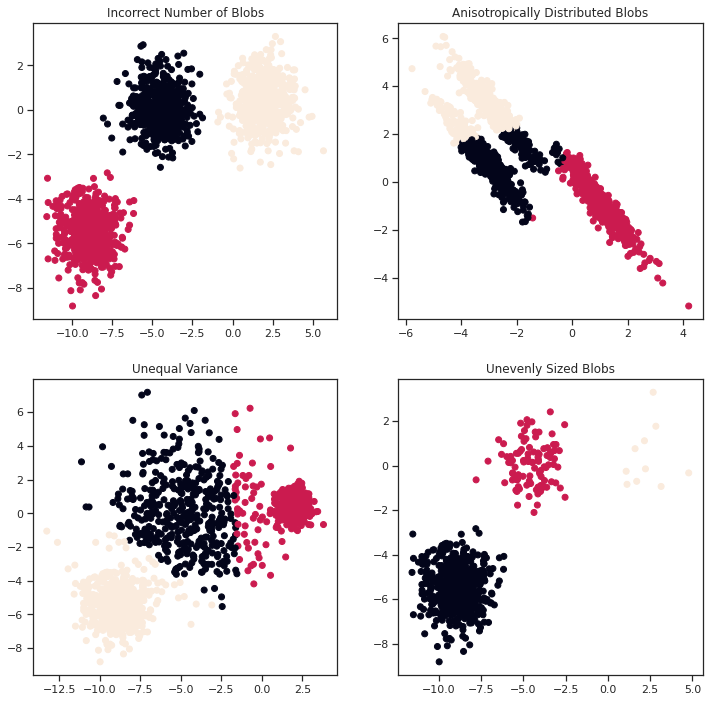

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropically Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

# 3 Machine Learning tradicional:

Técnicas de clasificación y regresión con datos supervisados.

## Procedimiento general

Partimos de una bsase de datos etiquetada, es decir de una matriz de datos $X$ de tamaño $n \times m$ donde n es el número de observaciones y m el número de variables o atributos. En problemas de naturaleza supervisada es preciso también disponer de un vector de etiquetas de clase $\omega_i, i=1\dots n$ que 
indique a la clase a la que pertenece cada una de las observaciones del conjunto de datos $X$. 

PAra entrenar un algoritmo de clasificación supervisada es preciso dividir el 
conjunto de datos y sus etiquetas en dos subconjuntos: 
- Un primer subconjunto que llamaremos de entrenamiento y qye servirá para diseñar/entrenar/ajustar el algoritmo. Este subconjunto suele construirse seleccionando aleatoriamente un $70\%$ de las $n$ observaciones. 

- El resto de observaciones se incuyen en un segundo subconjunto al que llamaremos conjunto de test o de validación y que servirá para determinar el rendimiento del clasificador. El rendimiento del clasificador se suele indicar en función del número de errores de clasificación, que en un problema con dos clases son ser del tipo falsa alarma u omisión.





## 3.1 Preparación de los datos: Conjuntos de entrenamiento y validación:

Cargemos el conjunto de datos iris y construyamos los subconjuntos de entrenamiento y validación:

In [ ]:
from sklearn.datasets import load_iris
diris = load_iris()

In [ ]:
diris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

Representemos los datos en forma de scatterplot multidimensional:

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

d = pd.DataFrame(diris.data,columns=diris.feature_names)
d['target'] = np.array(diris.target)
d.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]

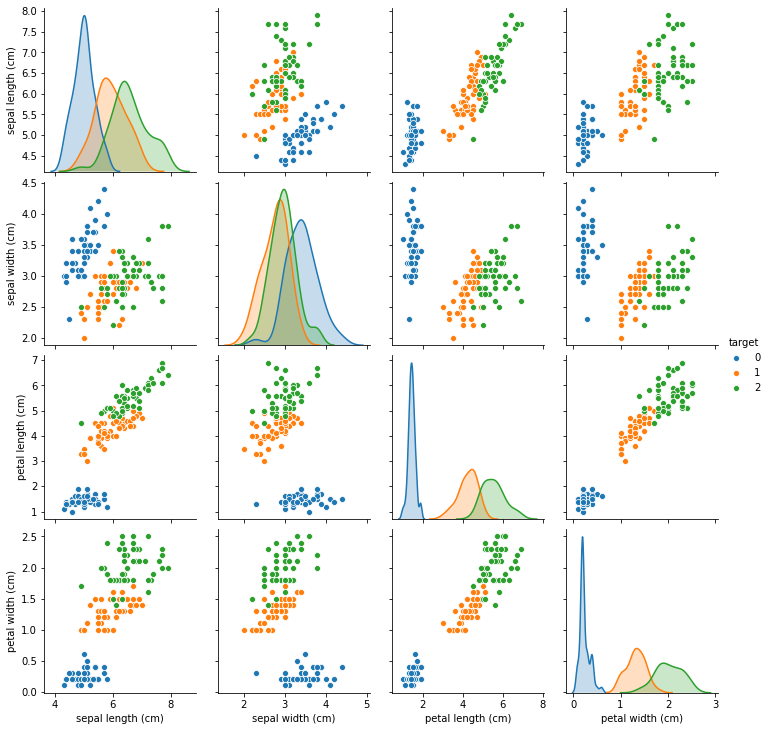

In [ ]:
sns.pairplot(d,hue='target')

In [ ]:
X = diris.data # matriz de datos 
y = diris.target    # vector de etiquetas de clase 

print('Hay {} observaciones y {} variables'.format(X.shape[0],X.shape[1]))
print('El vector de etiquetas de clase tiene {} componentes'.format(y.shape[0]))

Hay 150 observaciones y 4 variables
El vector de etiquetas de clase tiene 150 componentes


In [ ]:
np.unique(y)

array([0, 1, 2])

Dividamos el dataset en los subconjuntos de entrenamiento y test. La variable test_size indica la fracción de datos que guardamos para el test. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Número de observaciones del conjunto de entrenamiento es {}'.format(X_train.shape[0]))
print('Número de observaciones del conjunto de test es {}'.format(X_test.shape[0]))

Número de observaciones del conjunto de entrenamiento es 100
Número de observaciones del conjunto de test es 50


Ahora viene cuando sacamos la batería de algoritmos de clasificación supervisada. Cada uno responde a una idea de naturaleza algebraica, geométrica, estadística o informática. En toda la sesión utilizaremos las librerías de reconocimiento de patrones, inteligencia artificial y machine learning scikit-learn: https://scikit-learn.org/stable/

## 3.2 Clasificación KNN (k nearest neighbours, k Vecinos más cercanos)

Entrenamos el modelo

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Si queremos predecir la clase a la que pertenece la primera observación del conjunto de test, haremos:

In [ ]:
xnew = X_test[0].reshape(1,-1)
true_label = y_test[0]
predicted_label = knn.predict(xnew)
print('Observación a predecir es {}'.format(*xnew))
print('la clase real a la que pertenece es {}'.format(true_label))
print('la clase que predice el algoritmo KNN que hemos entrenado es {}'.format(predicted_label))

Observación a predecir es [6.1 2.8 4.7 1.2]
la clase real a la que pertenece es 1
la clase que predice el algoritmo KNN que hemos entrenado es [1]


Ahora procedemos a ver cómo se comporta el clasificador con todos los datos del conjunto de test:

In [ ]:
from sklearn.metrics import confusion_matrix

y_knn_pred = knn.predict(X_test)
confusion_matrix(y_test, y_knn_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

## 3.3 Naive Bayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()
y_NB_pred = gnb.fit(X_train, y_train).predict(X_test)

confusion_matrix(y_test, y_NB_pred)

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 15]])

## 3.4 Árboles de decisión (Decision trees):

https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)

Representar gráficamente el árbol de decisión:

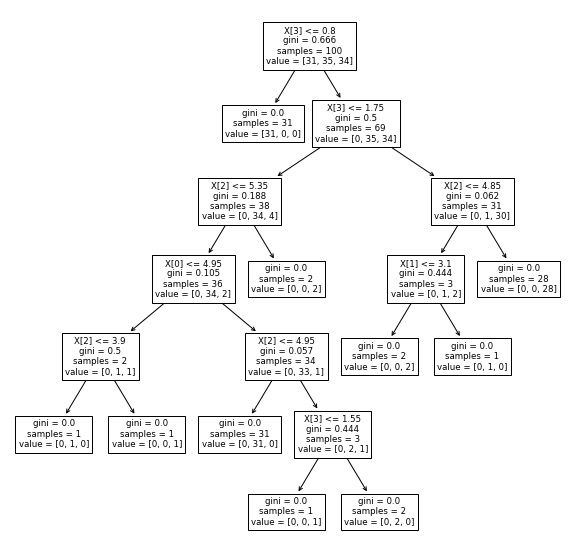

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax = plot_tree(dt) 
plt.show()

Deberíamos podar este árbol (pruning): https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py

Validar el rendimiento con el conjunto de test:

In [ ]:
y_DT_pred = dt.predict(X_test)

confusion_matrix(y_test, y_DT_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])

Los tres algoritmos funcionan igual de bien! El motivo es que el dataset de iris es fácil de clasificar. Probemos con un problema algo más complicado. 

En caso de querer trabajar con árboles de decisión y evitar el overfitting: 
- Pruning: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
- Clasificador de colectividad (ensamble classifier): Random forest : Promediar los resultados de predicción de un conjunto de árboles. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Selección de hiperparámetros utilizando GridSearchCV: https://scikit-learn.org/stable/modules/grid_search.html

### Ejercicio: Aplicar los algoritmos de clasificación KNN, Naive Bayes y Decision trees a la base de datos mtcars con el objetivo de predecir el origen del coche utilizando únicamente los atributos numéricos y eliminando las observaciones que tengan datos incompletos.


In [ ]:
import pandas as pd 
import seaborn as sns 
mpg = sns.load_dataset("mpg")
mpg_nonans = mpg.dropna() # remove observations with NaNs

mpg_num = mpg_nonans.select_dtypes(include='number') # keep only numeric variables 

print('datos originales = {}'.format(mpg.shape))
print('datos numericos sin NaNs = {}'.format(mpg_nonans.shape))
print('datos numericos = {}'.format(mpg_num.shape))


datos originales = (398, 9)
datos numericos sin NaNs = (392, 9)
datos numericos = (392, 7)


In [ ]:
mpg_num.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  model_year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70

In [ ]:
X = mpg_num
y = mpg_nonans['origin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [ ]:
X_train.shape

(262, 7)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
y_knn_pred = knn.fit(X_train, y_train).predict(X_test)
CM_KNN = confusion_matrix(y_test, y_knn_pred)
print('CONFUSION MATRIX KNN: \n {} '.format(CM_KNN))

gnb = GaussianNB()
y_NB_pred = gnb.fit(X_train, y_train).predict(X_test)
CM_NB = confusion_matrix(y_test, y_NB_pred)
print('CONFUSION MATRIX NB: \n {}'.format(CM_NB))

dt = tree.DecisionTreeClassifier()
y_DT_pred = dt.fit(X_train,y_train).predict(X_test)
CM_DT = confusion_matrix(y_test, y_DT_pred)
print('CONFUSION MATRIX DT: \n {}'.format(CM_DT))

CONFUSION MATRIX KNN: 
 [[ 9  2  6]
 [19 12  8]
 [ 8  8 58]] 
CONFUSION MATRIX NB: 
 [[12  4  1]
 [16 21  2]
 [15  9 50]]
CONFUSION MATRIX DT: 
 [[ 9  3  5]
 [11 24  4]
 [ 3  1 70]]


In [ ]:
mpg_nonans['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

## 3.5 Medidas de evaluación

A parte de la matriz de confusión, existen diferentes medidas y estrategias que permiten caracterizar el rendimiento de un clasificador supervisado. En esta página encontraréis un resumen de todas las medidas y su significado: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

### Precision, recall, f1-score: 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_DT_pred))

              precision    recall  f1-score   support

      europe       0.39      0.53      0.45        17
       japan       0.86      0.62      0.72        39
         usa       0.89      0.95      0.92        74

    accuracy                           0.79       130
   macro avg       0.71      0.70      0.69       130
weighted avg       0.81      0.79      0.79       130



### Validación cruzada de k-iteraciones: k-fold coss-validation: 
Se trata de una técnica que evalúa las medidas de rendimiento del clasificador promediado los resultados obtenidos en k iteraciones de entrenamiento y valiadción. En cada iteración se dividen los datos de forma aleatoria entre 
entrenamiento y test de manera en cada iteración el algoritmo se entrena con diferentes conjuntos de entrenamiento y se evalúa con diferentes conjuntos de test. El rendimiento final se calcula promediando los resultados obtenidos en las k iteraciones. 

Podéis encontrar una descripción detallada de la técnica en https://en.wikipedia.org/wiki/Cross-validation_(statistics)

Calcumemos por ejemplo la accuracy del modelo de árboles de decisión utilizando k-fold cross-validation con $k=5$:

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.75 (+/- 0.18)


## 3.6 Máquinas de soporte vectorial con optimización de hiperparámetros

Support vector machines es una técnica que utiliza un truco llamado 'Kernel Trick': https://en.wikipedia.org/wiki/Kernel_method

De forma general, permite resolver problemas de clasificación en conjuntos de datos que no sean linealmente separables, es decir, en los que no se puede trazar fronteras de decisión lineales para separar las observaciones de las diferentes clases en el espacio multidimensional de los atributos. 

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_svm_pred = clf.predict(X_test)
confusion_matrix(y_test, y_svm_pred)

array([[10,  6,  1],
       [10, 23,  6],
       [ 5,  5, 64]])

## 3.7 Evaluación de tiempos de CPU: 

Cómo determinar los tiempos de entrenamiento y de predicción:

In [ ]:
import time
startt = time.perf_counter()
clf.fit(X_train, y_train)
fitt = time.perf_counter()-startt
    
print('Training time is: {} seconds '.format(fitt))

startt = time.perf_counter()
score = clf.score(X_test, y_test)
scoret = time.perf_counter() - startt
print('Evaluation time is: {} seconds '.format(scoret))


Training time is: 44.445132277000084 seconds 
Evaluation time is: 0.002080657000078645 seconds 


## 3.8 Redes neuronales: Artificial Neural Networks

### A GUI to understand the relevance of structure and parameters in ANNs:


Tinkering an artificial neural network with TensorFlow


http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,1&seed=0.82329&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false


In [ ]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(alpha=1, max_iter=1000)

ann.fit(X_train, y_train)

y_ann_pred = ann.predict(X_test)
confusion_matrix(y_test, y_ann_pred)


array([[ 9,  0,  8],
       [19,  6, 14],
       [ 3,  0, 71]])

## 3.9 Comparación de las diferentes técnicas de clasificación con diferentes tipos de datos:

Se trata de un ejemplo extraído de la documentación de las librerías scikit-learn: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

Automatically created module for IPython interactive environment


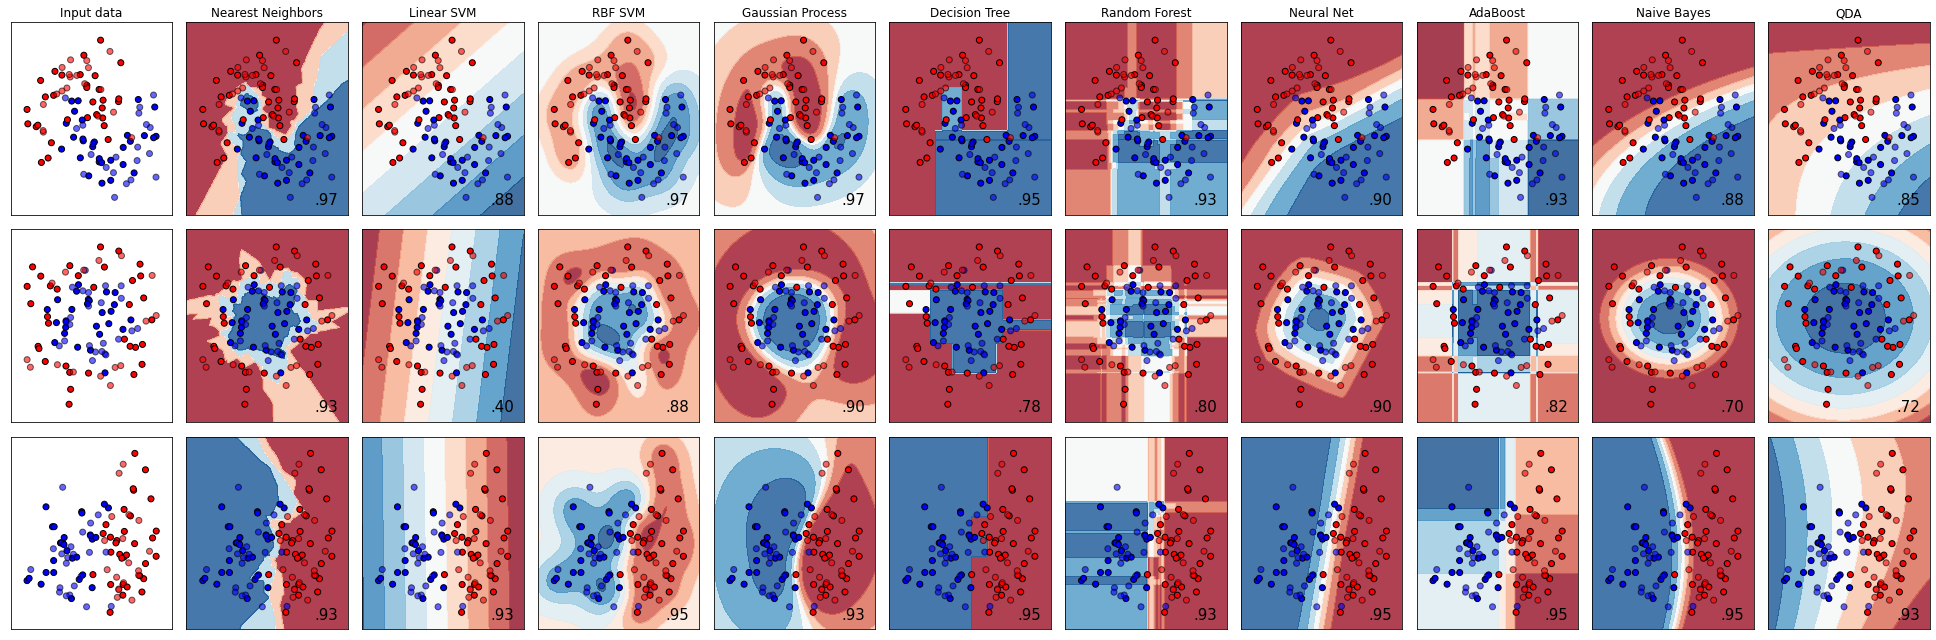

In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

# 4 Técnicas de aprendizaje profundo (deep learning) 


Introducción a la clasificación de imágenes con redes neuronales convolucionales - Qué es el aprendizaje profundo (deep Learning)? 

![alt text](https://drive.google.com/uc?export=view&id=1Ib2sunEZFKfYP_jThatYleQuc7Tm7mFL)



## 4.1 Procesado de imágenes básico: 

### Reading a grayscale image

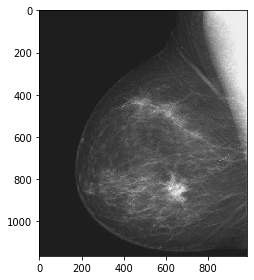

In [ ]:
from skimage import io
I = io.imread('/content/gdrive/My Drive/data_course/image1.tif') # read image using imread function
io.imshow(I) # visualize image using imshow function
io.show() 

Check image size:

In [ ]:
I.shape # Size of image in pixels

(1164, 984)

Access to origin pixel (top-left, DARK REGION) 

In [ ]:
I[0,0] # Pixel value of first row, first column

38

Access to top-right region (LIGHT REGION)

In [ ]:
I[0,983] # Pixel value of first row, last column

238

Digital encoding of the pixel grayscale levels: 

In [ ]:
I.dtype

dtype('uint8')

'uint8' stands for *unsigned integer of 8 bits*, meaning that each pixel in the image is encoded with 8 bits representing an integer in the range [0,255]. In general, a n-bit grayscale image allows a range in levels from 0 to $2^n - 1$. 

### Represent pixels along a certain row: 

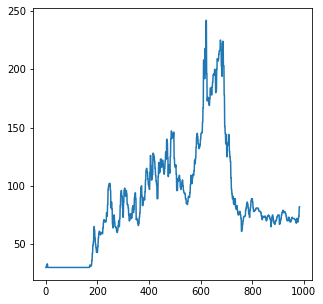

In [ ]:
Irow = I[850,:] # pixels along the row 850 

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.plot(Irow)
plt.show()

### Read a RGB color image:

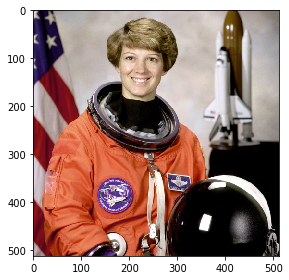

M = 512 columns, N = 512 rows, NC = 3 color channels


In [ ]:
import skimage as sk # load skimage libraries
IC = sk.data.astronaut() # load a color image from the skimage built-in dataset
# change colormap to visualize image
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show() 
print('M = {} columns, N = {} rows, NC = {} color channels'.format(*IC.shape)) # Print out image size

Check image size:

In [ ]:
IC.shape

(512, 512, 3)

### Convert color to grayscale:

$IG = 0.2125 \cdot R + 0.7154\cdot G + 0.0721\cdot B$


In [ ]:
IG = sk.color.rgb2gray(IC)
IG.shape

(512, 512)

### Using colormaps

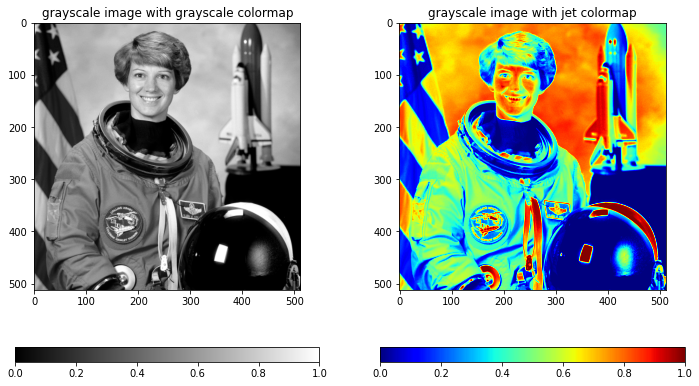

In [ ]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(1,2,figsize=(12,7))
ax = axes.ravel() # convert axes to a 1d array
im1 = ax[0].imshow(IG,cmap=plt.cm.gray) # visualize image using imshow function using a grayscale colormap
ax[0].set_title('grayscale image with grayscale colormap') # set figure title
fig.colorbar(im1,ax=ax[0],orientation='horizontal') # visualize colorbar 
im2 = ax[1].imshow(IG,cmap=plt.cm.jet) # visualize image using imshow function using a grayscale colormap
ax[1].set_title('grayscale image with jet colormap') # set figure title
fig.colorbar(im2,ax=ax[1],orientation='horizontal') # visualize colorbar 
sk.io.show() 

### Convert image to different formats:
Convert an image to unsigned byte format, with values in [0, 255].


In [ ]:
from skimage.util import img_as_ubyte
IGB = img_as_ubyte(IG)

### Image histogram:

Distribution of pixel values, how many pixels are there in the image for each grayscale level? 


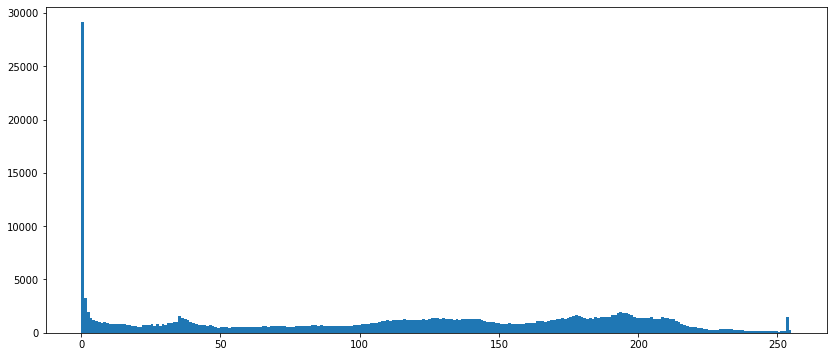

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# reshape the uint8 image as 1d array:
v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

There are too many zeros in the image, take them out in order to properly visualize the distribution: 

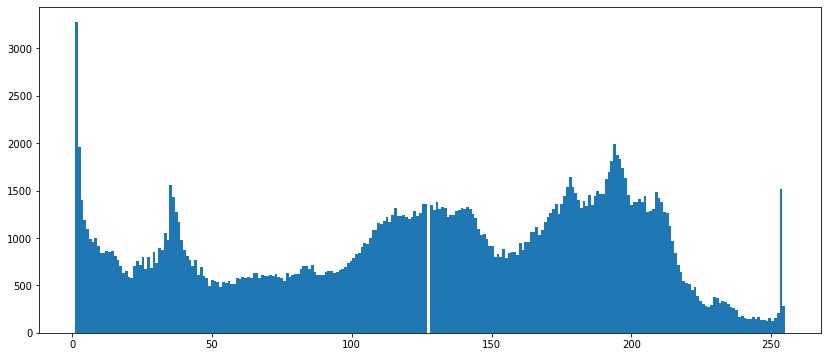

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# keep only pixels with a value higher than zero: 
v = v[v>0]
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

 Represent the normalized histogram corresponding to the probability distribution function of the graylevel pixel occurence

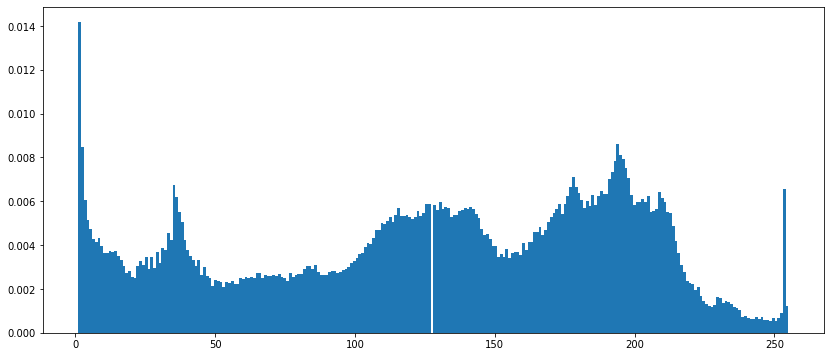

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# keep only pixels with a value higher than zero: 
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=True)
plt.show()

Cummulative probability distribution function (cdf) of grayscale levels: Area over the curve of the normalized histogram

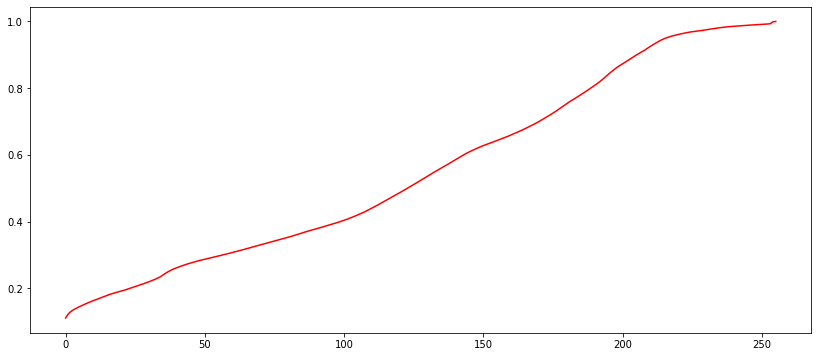

In [ ]:
 from skimage import exposure

img_cdf, bins = exposure.cumulative_distribution(IGB, 255)
fig = plt.figure(figsize=(14, 6))
plt.plot(bins,img_cdf,'r')
plt.show()

Compute the median of the image (grayscale level at which the cdf is 0.5): 

In [ ]:
v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)
np.median(v)

123.0

### Filtrado de imágenes y convolución 2D

In [ ]:
import numpy as np
from scipy import ndimage

# Imagen:
I = np.zeros((11,11))
I[3,3]=1

# Filtro: 
h = np.array([[1,2,3],[4,5,6],[7,8,9]])

# convolucion 2D:
Iconvh = ndimage.convolve(I, h, mode='constant', cval=0.0)
Iconvh

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 2., 3., 0., 0., 0., 0., 0., 0.],
       [0., 0., 4., 5., 6., 0., 0., 0., 0., 0., 0.],
       [0., 0., 7., 8., 9., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Aplicar la convolución para filtrar imágenes: Filtro de promedio local:

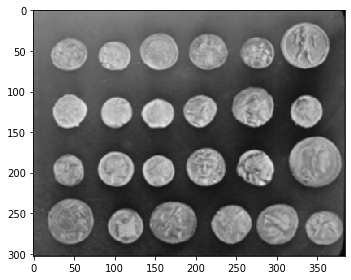

In [ ]:
import numpy as np
from scipy import ndimage

# Imagen:
from skimage import data
I = data.coins()

# Filtro: 
h = (1/9)*np.ones((3,3))

# convolucion 2D:
Iconvh = ndimage.convolve(I, h, mode='constant', cval=0.0)

sk.io.imshow(Iconvh) # visualize image using imshow function
sk.io.show() 


Comparar la imagen original y la filtrada:

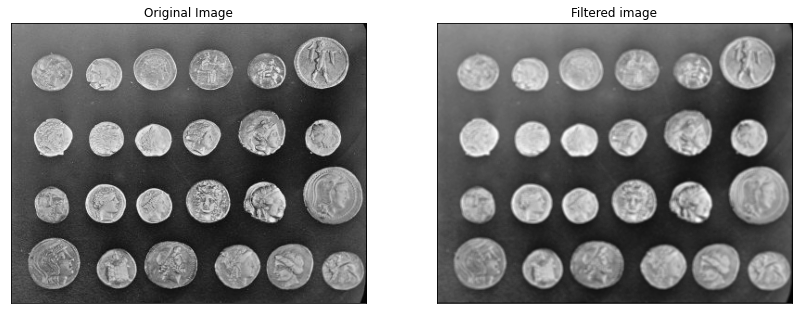

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 6))
plt.subplot(121),plt.imshow(I, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Iconvh, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

## 4.2 Ejemplo: Reconocimiento de dígitos escritos a mano: 

Example using the MNIST dataset of images of handwritten numbers: http://yann.lecun.com/exdb/mnist/

In [ ]:
# Load MNIST database and Keras libraries:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_last') #(batch, height, width, channels)


# Set the seed of the random number generator to ensure reproducibility of the results:
seed = 7
numpy.random.seed(seed)

# Define training and test data: images+class labels
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

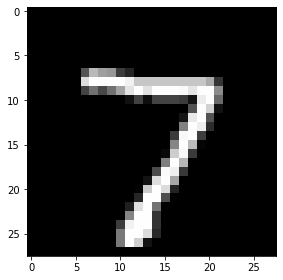

In [ ]:
sk.io.imshow(X_test[0]) # visualize image using imshow function
sk.io.show()

In [ ]:
# Reshape the images as vectors: 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')#(batch, height, width, channels)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32')#(batch, height, width, channels)

# Normalize grayscale images 0-255 into values between from 0-1:
X_train = X_train / 255
X_test = X_test / 255

# Encode class labels in categorical vector format with ten positions: 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
num_classes

10

In [ ]:
y_test.shape

(10000, 10)

mirar las dimensiones de las imágenes y de los conjuntos de entrenamiento y test:

In [ ]:
print('Las dimensiones de X_train son {}'.format(X_train.shape))
print('Las imágenes son de un tamaño {} x {}'.format(X_train[0].shape[1],X_train[0].shape[1]))
print('El número de imágenes del conjunto de entrenamiento es {}'.format(X_train.shape[0]))
print('El número de imágenes del conjunto de test es {}'.format(X_test.shape[0]))

Las dimensiones de X_train son (60000, 28, 28, 1)
Las imágenes son de un tamaño 28 x 28
El número de imágenes del conjunto de entrenamiento es 60000
El número de imágenes del conjunto de test es 10000



### Define the architecture of the Convolutional Neural Network:


In [ ]:
def baseline_model():
# First layer (Input):
	model = Sequential() 
# Second layer (Convolucional):
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28,1), activation='relu')) 	
# Third layer (pooling):
	model.add(MaxPooling2D(pool_size=(2, 2))) 
# Fourth layer (regularization)
	model.add(Dropout(0.2))
# Fifth layer (Reshape, flatten): 
	model.add(Flatten())
# Sixth layer (fully connected)
	model.add(Dense(128, activation='relu',name='f')) 
# Seventh layer (output, softmax):
	model.add(Dense(num_classes, activation='softmax')) 
# Compile the model and specify optimization method and performance metrics:
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Entrenemos el modelo:

In [ ]:
# Model instantiation: 
model = baseline_model()
# Adjust the model parameters using the training and test data:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=200, verbose=2)

# Evaluation of the model using the test data:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy of the model: %.2f%%" % (100*scores[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
 - 29s - loss: 0.2296 - accuracy: 0.9347 - val_loss: 0.0835 - val_accuracy: 0.9749
Epoch 2/3
 - 29s - loss: 0.0701 - accuracy: 0.9791 - val_loss: 0.0489 - val_accuracy: 0.9840
Epoch 3/3
 - 29s - loss: 0.0503 - accuracy: 0.9849 - val_loss: 0.0393 - val_accuracy: 0.9880
Accuracy of the model: 98.80%


### How to use the CNN as Feature Extractor and classify images using a SVM

Define a new model by setting the output of the previous CNN just before the classification layers: Let's use this model to extract features



In [ ]:
from keras.models import Model
from sklearn.svm import SVC

model1 = Model(inputs=model.input, outputs=model.get_layer('f').output)

# Extract the training CNN features by projecting the training data using the new model
X_train_cnn = model1.predict(X_train)

Tamaño de los atributos extraídos:

In [ ]:
X_train_cnn.shape

(60000, 128)

Ahora entrenamos una SVM con los atributos que hemos extrído de cada imagen:

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

# Train a SVM with the CNN features:

# convert class labels as an array of integers:
y_test1 = np.argmax(y_test,axis=1)
y_train1 = np.argmax(y_train,axis=1)


clf2 = SVC(kernel='linear', class_weight='balanced')
clf2 = clf2.fit(X_train_cnn, y_train1)
print("Predicting people's names on the test set")
X_test_cnn = model1.predict(X_test)
y_pred2 = clf2.predict(X_test_cnn)

print(confusion_matrix(y_test1, y_pred2))
print('Accuracy ={}'.format(accuracy_score(y_test1, y_pred2)))


Predicting people's names on the test set
[[ 974    0    0    0    0    1    2    1    2    0]
 [   0 1130    2    0    0    0    2    0    1    0]
 [   3    1 1017    1    2    0    1    3    4    0]
 [   0    0    2 1005    0    1    0    0    2    0]
 [   1    0    0    0  972    0    2    0    0    7]
 [   2    0    0    9    0  878    2    0    1    0]
 [   2    2    0    1    2    5  943    0    3    0]
 [   0    2    6    2    2    0    0 1011    2    3]
 [   3    0    4    2    1    3    0    1  954    6]
 [   0    0    2    3    5    6    0    4    4  985]]
Accuracy =0.9869


## 4.3 Ejemplo: Clasificación de imágenes:

### Load the data:

Load CIFAR10 data from Keras tensorflow built-in datasets:

https://www.tensorflow.org/datasets/catalog/cifar10

https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
import numpy as np

import os

num_classes = 10
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Have it as an array of integers:
y_test1 = np.argmax(y_test,axis=1)
y_train1 = np.argmax(y_train,axis=1)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


### Represent first image of each class in the training set:

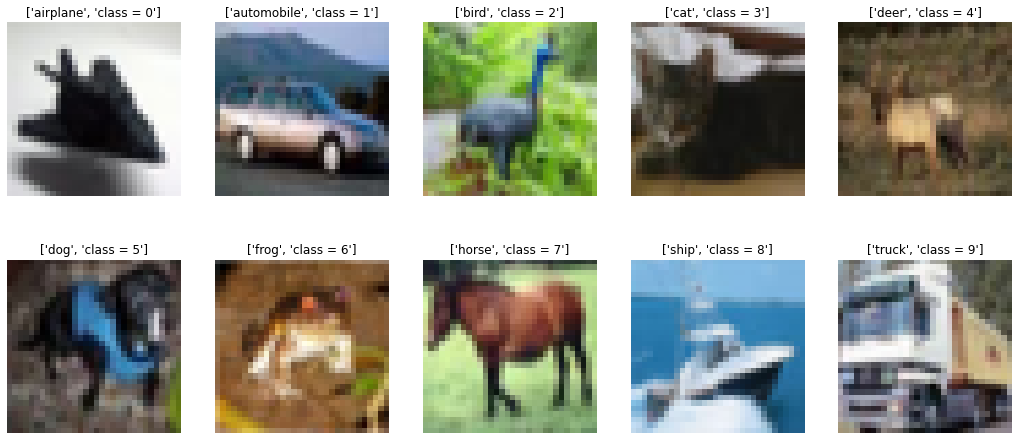

In [ ]:
import skimage as sk # load skimage libraries
from skimage import io
import matplotlib.pylab as plt

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(18, 8))

for kclass in range(0,10):
    ind = np.argwhere(y_train1==kclass)
    ax = fig.add_subplot(2, 5, kclass+1)
    ax.imshow(x_train[ind[0][0]]) 
    ax.set_title([label_names[kclass], 'class = {}'.format(kclass)])
    ax.axis('off')

### Represent 10 images from the 'ship' class randomly selected from the training set and describe the observed differences and similarities:

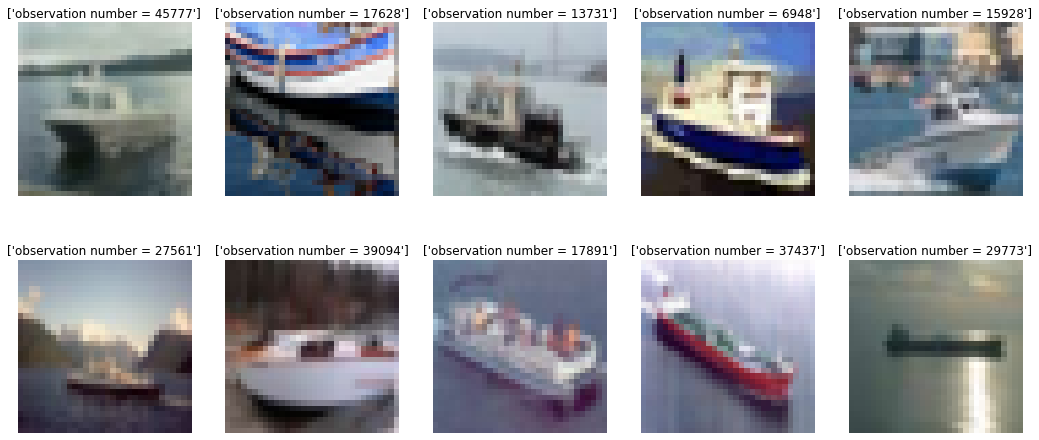

In [ ]:
import numpy as np

ind_ship = np.squeeze(np.where(y_train1==8))
vrandom = np.random.choice(ind_ship, size=10,replace=False)  

fig = plt.figure(figsize=(18, 8))
cnt = 0
for kship in vrandom:
    ax = fig.add_subplot(2, 5, cnt+1)
    ax.imshow(x_train[kship]) 
    ax.set_title(['observation number = {}'.format(kship)])
    ax.axis('off')
    cnt = cnt+1 

Most ship images contain a background with either water or sky, but the color of the water is rather different in each observation. The colors of the ships can also ve very heterogeneous, ranging from red to yellow to white. 

### Training a custom CNN


Execute the example with a custom CNN for both feature extraction and classification: 

Get the results in the case of not having aumented data whd using batch_size = 32
epochs = 2


https://keras.io/examples/cifar10_cnn/

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax',name='visualize_this'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 64)      

### Train the model with training subset:

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

batch_size = 32
epochs = 1

model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 243s 5ms/step - loss: 1.8259 - accuracy: 0.3309 - val_loss: 1.5395 - val_accuracy: 0.4406


CPU time is around 297 seconds per epoch. The model has a total of 1,250,858 parameters.

Save model parameters after training:

In [ ]:
# model.save_weights("model.h5")

### Número de parámetros entrenables de una CNN: 

The number of parameters a convolutional layer with N kernels of size mxm can be computed as:

Total number of parameters = Number of kernel coefficients + Number of bias coefficients, where 

- Number of kernel coefficients = (N kernels) * ($m^2$ coefficients per kernel) * (NC of channels of the kernel inputs)
- Number of bias coefficients: 1 bias (constant value) added to each kernel = N bias

For instance, in the first convolutional layer conv2d_1, we have N = 32 kernels, each one of size 3x3 (m=3) and the input has NC=3 color channels. Therefore the number of parameters is $32*3^2*3+32 = 896$

Similarly, the second convolutional layer conv2d_2 in the CNN have N=32 kernels of size 3x3 (m=3) but the input now is NC=32, therefore the number of paramenters is given by: 

conv2d_2 (N=32, m=3, NC=32): $32*3^2*32+32 = 9248$

Applying the same procedure, the following inner convolutional layers have the parameters:

conv2d_3 (N=32, m=3, NC=64): $64*3^23*32+64 = 18496$

conv2d_4 (N=64, m=3, NC=64): $64*3^2*64+64 = 36928$

### Evaluate performace with the test subset:

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

from sklearn.metrics import confusion_matrix,classification_report

y_pred = model.predict(x_test)
y_pred1 = np.argmax(y_pred,axis=1)

cm = confusion_matrix(y_test1, y_pred1)

print(cm)
print(classification_report(y_test1, y_pred1))

10000/10000 [==============================] - 11s 1ms/step
Test loss: 1.539541681289673
Test accuracy: 0.4406000077724457
[[398  89  26  16  17  21  20  36 271 106]
 [ 14 666   0   7   3   3  17  21  64 205]
 [ 65  54 110  62 252  83 166 110  63  35]
 [ 18  43  37 158  79 163 269 115  25  93]
 [ 36  29  36  46 372  65 209 137  32  38]
 [  8  34  32 107 104 323 161 146  34  51]
 [  3  32  15  38 122  26 634  54   9  67]
 [ 13  52  10  40  66  78  89 518  23 111]
 [ 74 104   7  18   4  16  15  10 638 114]
 [ 19 217   4  11   4   7  41  27  81 589]]
              precision    recall  f1-score   support

           0       0.61      0.40      0.48      1000
           1       0.50      0.67      0.57      1000
           2       0.40      0.11      0.17      1000
           3       0.31      0.16      0.21      1000
           4       0.36      0.37      0.37      1000
           5       0.41      0.32      0.36      1000
           6       0.39      0.63      0.48      1000
           7 

Best recognition results are obtained for the class '8:ship'. Worst results are for class '3:cat'. 
Inspecting the confusion matrix, the highest confusion is that 207 observations from class '0:airplane' are erroneously assigned to class '8:ship'. Perhaps due to the presence of a blue background (sky or sea). Note that surprinsignly only 97 ships have been erroneously assigned to airplanes. It seems that it is easier to recognize ships than airplanes. 


### Trabajando con arquitecturas CNN predefinidas


Create a model using VGG16 architecture but adapting the shape of the input to the size of the images of the CIFAR-10 dataset. Use the Keras’ function Model (https://keras.io/models/model/ ) specifying the parameters include_top = True, weights=None, input_tensor = None, input_shape = (32,32,3) and classes = 10. Provide a summary of the resulting architecture and describe the main differences with the model used in exercise 1. 

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

modelc = VGG16(include_top=True, weights=None, input_tensor=None, input_shape=(32,32,3), pooling=None, classes=10)
modelc.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

The VGG16 model has a total of 13 convolutional layers, many more than the original custom model.
The number of parameters of the VGG16 model is much larger too: 33,638,218 vs 1,250,858 parameters, 26 times more parameters! 

In [ ]:
print('Fraction of Increase in number of parameters VGG16/custom models ={}'.format(33638218/1250858))

Fraction of Increase in number of parameters VGG16/custom models =26.892115651816592


### Train the predefined CNN architecture:

Train the model using the training data and evaluate with the test set (batch_size = 32 and epochs = 2):

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
modelc.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

batch_size = 32
epochs = 2

modelc.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

#modelc.save_weights("modelc.h5")

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
 4096/50000 [=>............................] - ETA: 1:20:40 - loss: 2.3040 - accuracy: 0.1125

KeyboardInterrupt: ignored

It becomes evident that 2 epochs is clearly insufficient to train the model. 

In [ ]:
scores = modelc.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

y_pred = modelc.predict(x_test)
y_pred1 = np.argmax(y_pred,axis=1)
cmb = confusion_matrix(y_test1, y_pred1)

print(cmb)
print(classification_report(y_test1, y_pred1))

All the observations have been assigned to classes 3 and 4. 

### Transfer learning 

Cómo utilizar las CNN sin necesidad de entrenarlas

Apply the VGG16 pre-trained with the imagenet dataset to extract features and classify using a Support Vector Machine: 

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

modeld = VGG16(weights='imagenet', include_top=False,input_shape=(32,32,3))

Extract features

In [ ]:
featd_test = modeld.predict(x_test)
featd_train = modeld.predict(x_train)

Fit a SVC that classifies using the extracted features:

In [ ]:
from keras.models import Model
from sklearn.svm import SVC

clf2 = SVC(kernel='linear', class_weight='balanced',gamma=0.001)

dd = np.squeeze(featd_train)
clf2 = clf2.fit(dd, y_train1)
feat1_test = np.squeeze(featd_test)

In [ ]:
ddtest = np.squeeze(featd_test)
y_pred2 = clf2.predict(ddtest)
print(classification_report(y_test1, y_pred2))
print(confusion_matrix(y_test1, y_pred2))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1000
           1       0.64      0.67      0.65      1000
           2       0.51      0.48      0.49      1000
           3       0.43      0.44      0.44      1000
           4       0.55      0.54      0.55      1000
           5       0.54      0.49      0.52      1000
           6       0.62      0.68      0.65      1000
           7       0.67      0.63      0.65      1000
           8       0.70      0.70      0.70      1000
           9       0.62      0.60      0.61      1000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000

[[676  32  63  20  12  15  10  24 115  33]
 [ 46 672  17  31  14  24  23  16  42 115]
 [ 86  20 483  76 113  65  94  36  13  14]
 [ 26  44  80 443  55 132 110  37  23  50]
 [ 31  10  91  72 544  31  91  86  29  15]
 [ 17  29  76 178  65 489 

Results are rather poor: 
- class 1 gets confused all around, with only 79/1000 instances correcly classified as class 1 
- Class 9 is the one with best performace, since we correctly classify 669/1000 instances
- Class 7 is the worst, we only get 41/1000 correctly classified

Conclusion: It is generally better to have a simpler model with proper training than a very complex architecture with a training that doesn't get the best features for our problem. 



Más información y detalles sobre la implementación con las librerías Keras:

https://keras.io/api/applications/

https://keras.io/examples/

https://keras.io/examples/vision/image_classification_from_scratch/

https://keras.io/examples/vision/mnist_convnet/



## 4.4 Ejemplo: Reconocomiento de caras

Try now with the image database Labeled Faces in the Wild: http://vis-www.cs.umass.edu/lfw/

It is also included as a dataset in the sklearn libraries:

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

lfw_people = fetch_lfw_people(min_faces_per_person=200,  funneled=True,resize=1)
# Load images:
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
# Get class labels: 
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# Define training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Now the shape of data is 

In [ ]:
y_test

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
X_train1.shape

(536, 125, 94, 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

###########################
# Cargar librerias Keras:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_last') #(batch, height, width, channels)


# Establecer la semilla del generador de numeros aleatorios para garantizar reproducibilidad de los resultados 
seed = 7
numpy.random.seed(seed)

# Dimensionar las imagenes en vectores 
X_train1 = X_train.reshape(X_train.shape[0], 125, 94,1).astype('float32')
X_test1 = X_test.reshape(X_test.shape[0], 125, 94,1).astype('float32')

# Normalizar las imagenes de escala de grises 0-255 (valores entre 0-1):
X_train1 = X_train1 / 255
X_test1 = X_test1 / 255

# Codificar las etiquetas de clase en formato de vectores categoricos con diez posiciones: 
y_train1 = np_utils.to_categorical(y_train)
y_test1 = np_utils.to_categorical(y_test)
num_classes = y_test1.shape[1]

# Funcion en la que se define la arquitectura del modelo:
def baseline_model():
# Capa de entrada:
	model = Sequential() 
# Primera capa (Convolucional):
	model.add(Conv2D(32, (5, 5), input_shape=(125, 94,1), activation='relu')) 	
# Tercera capa (agrupamiento):
	model.add(MaxPooling2D(pool_size=(2, 2))) 
# Cuarta capa (regularizacion)
	model.add(Dropout(0.2))
# Quinta capa (redimensionamiento): 
	model.add(Flatten())
# Sexta capa (completamente conectada)
	model.add(Dense(128, activation='relu',name='f')) 
# Capa de salida (softmax):
	model.add(Dense(num_classes, activation='softmax')) 
# Compilar el modelo y especificar metodo y metrica de optimizacion:
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# Llamada al modelo: 
model = baseline_model()

# Ajustar el modelo utilizando los datos de entrenamiento y validacion con los de test:
model.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=10, batch_size=200, verbose=2)

# Evaluacion del modelo utilizando los datos de test:
scores1 = model.evaluate(X_test1, y_test1, verbose=0)
print("Exactitud del modelo: %.2f%%" % (100*scores1[1]))
#
y_pred1 = model.predict(X_test1)

# Evaluation of the model using the test data:
scores = model.evaluate(X_test1, y_test1, verbose=0)
print("Accuracy of the model: %.2f%%" % (100*scores[1]))

Train on 536 samples, validate on 230 samples
Epoch 1/10
 - 8s - loss: 5.5091 - accuracy: 0.5522 - val_loss: 0.7455 - val_accuracy: 0.6913
Epoch 2/10
 - 5s - loss: 1.6664 - accuracy: 0.4422 - val_loss: 1.5165 - val_accuracy: 0.3087
Epoch 3/10
 - 5s - loss: 1.1410 - accuracy: 0.3078 - val_loss: 0.6157 - val_accuracy: 0.6913
Epoch 4/10
 - 5s - loss: 0.6250 - accuracy: 0.6922 - val_loss: 0.6802 - val_accuracy: 0.6913
Epoch 5/10
 - 5s - loss: 0.6614 - accuracy: 0.6922 - val_loss: 0.6447 - val_accuracy: 0.6913
Epoch 6/10
 - 5s - loss: 0.6323 - accuracy: 0.6922 - val_loss: 0.6237 - val_accuracy: 0.6913
Epoch 7/10
 - 5s - loss: 0.6127 - accuracy: 0.6922 - val_loss: 0.6116 - val_accuracy: 0.6913
Epoch 8/10
 - 5s - loss: 0.6046 - accuracy: 0.6922 - val_loss: 0.6075 - val_accuracy: 0.6913
Epoch 9/10
 - 5s - loss: 0.6024 - accuracy: 0.6922 - val_loss: 0.6075 - val_accuracy: 0.6913
Epoch 10/10
 - 5s - loss: 0.6027 - accuracy: 0.6922 - val_loss: 0.6066 - val_accuracy: 0.6913
Exactitud del modelo: 6

In [ ]:

############################################################
### EJERCICIO 3: CNN as FE + SVM
############################################################
from keras.models import Model

# Aplicar nomes les capes de extraccio d'atributs:
model1 = Model(inputs=model.input, outputs=model.get_layer('f').output)
X_train_cnn = model1.predict(X_train1)

clf2 = SVC(kernel='linear', class_weight='balanced')
clf2 = clf2.fit(X_train_cnn, y_train)

print("Predicting people's names on the test set")
X_test_cnn = model1.predict(X_test1)
y_pred2 = clf2.predict(X_test_cnn)
print(classification_report(y_test, y_pred2, target_names=target_names))
print(confusion_matrix(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2, normalize=True, sample_weight=None))

from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(clf2, X_test_cnn, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))


Predicting people's names on the test set
               precision    recall  f1-score   support

 Colin Powell       0.44      0.63      0.52        71
George W Bush       0.80      0.64      0.71       159

     accuracy                           0.64       230
    macro avg       0.62      0.64      0.62       230
 weighted avg       0.69      0.64      0.65       230

[[ 45  26]
 [ 57 102]]
0.6391304347826087
Accuracy: 0.63 (+/- 0.15)
